In [1]:
%load_ext autoreload
%autoreload 2


import torch
from model import LofiModel
from config import *
from train import train
print(torch.__version__)
print(torch.version.cuda)

2.7.1+cu118
11.8


# Config

In [2]:
model = LofiModel()
# model.load_weights(r"C:\Users\Hyperbook\Desktop\STUDIA\SEM III\PZ#2\model\checkpoints\Modele LOFI\lofi_model_epoch_320.pth")
print(model)
print(f"Model has {sum(p.numel() for p in model.parameters()) / 1e6:.2f} M parameters.\n")

LofiModel(
  (encoder): Encoder(
    (input_projection): Linear(in_features=36, out_features=128, bias=True)
    (lstm): LSTM(128, 512, num_layers=2, batch_first=True, bidirectional=True)
    (fc_mu): Linear(in_features=1024, out_features=512, bias=True)
    (fc_logvar): Linear(in_features=1024, out_features=512, bias=True)
  )
  (decoder): HierarchicalDecoder(
    (z_to_conductor_initial): Linear(in_features=512, out_features=2048, bias=True)
    (conductor): LSTM(1, 512, num_layers=2, batch_first=True)
    (conductor_to_decoder_initial): Linear(in_features=512, out_features=2048, bias=True)
    (decoder_rnn): LSTM(1, 512, num_layers=2, batch_first=True)
    (output_projection): Linear(in_features=512, out_features=108, bias=True)
  )
)
Model has 18.45 M parameters.



# Training

Using device: cuda

Loading dataset with sliding window...
Found 1276 MIDI files.
Processing MIDI files, normalizing tempo, and extracting segments...


Processing files: 100%|██████████| 1276/1276 [02:41<00:00,  7.92it/s]


Successfully extracted 105286 segments from 1276 files.
Dataset split into: Train=89493, Validation=15793
Finished preparing dataset.

Calculating class weights...


Analyzing dataset for weights: 100%|██████████| 2797/2797 [00:01<00:00, 1527.69it/s]


Calculated class weights: [0.019432129338383675, 0.4869954586029053, 0.4935724139213562]


COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: torch, sklearn.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/ziemmi13/lofi-vae/6db2f590a4da45369568495fc1d23950



-----------------------------
----- Starting training -----
-----------------------------



Epoch 1/200 [Training]: 100%|██████████| 2797/2797 [01:58<00:00, 23.64it/s, Loss=0.9122, Recon=0.9122, KL=1.1404, beta=0.0000]



Epoch 1 Summary: Avg Train Loss: 0.9795, Avg Val Loss: 1.0614

Generating visualization for epoch 1:
Converting tensor to MIDI file at reconstructed/reconstructed.mid...
MIDI file saved successfully.


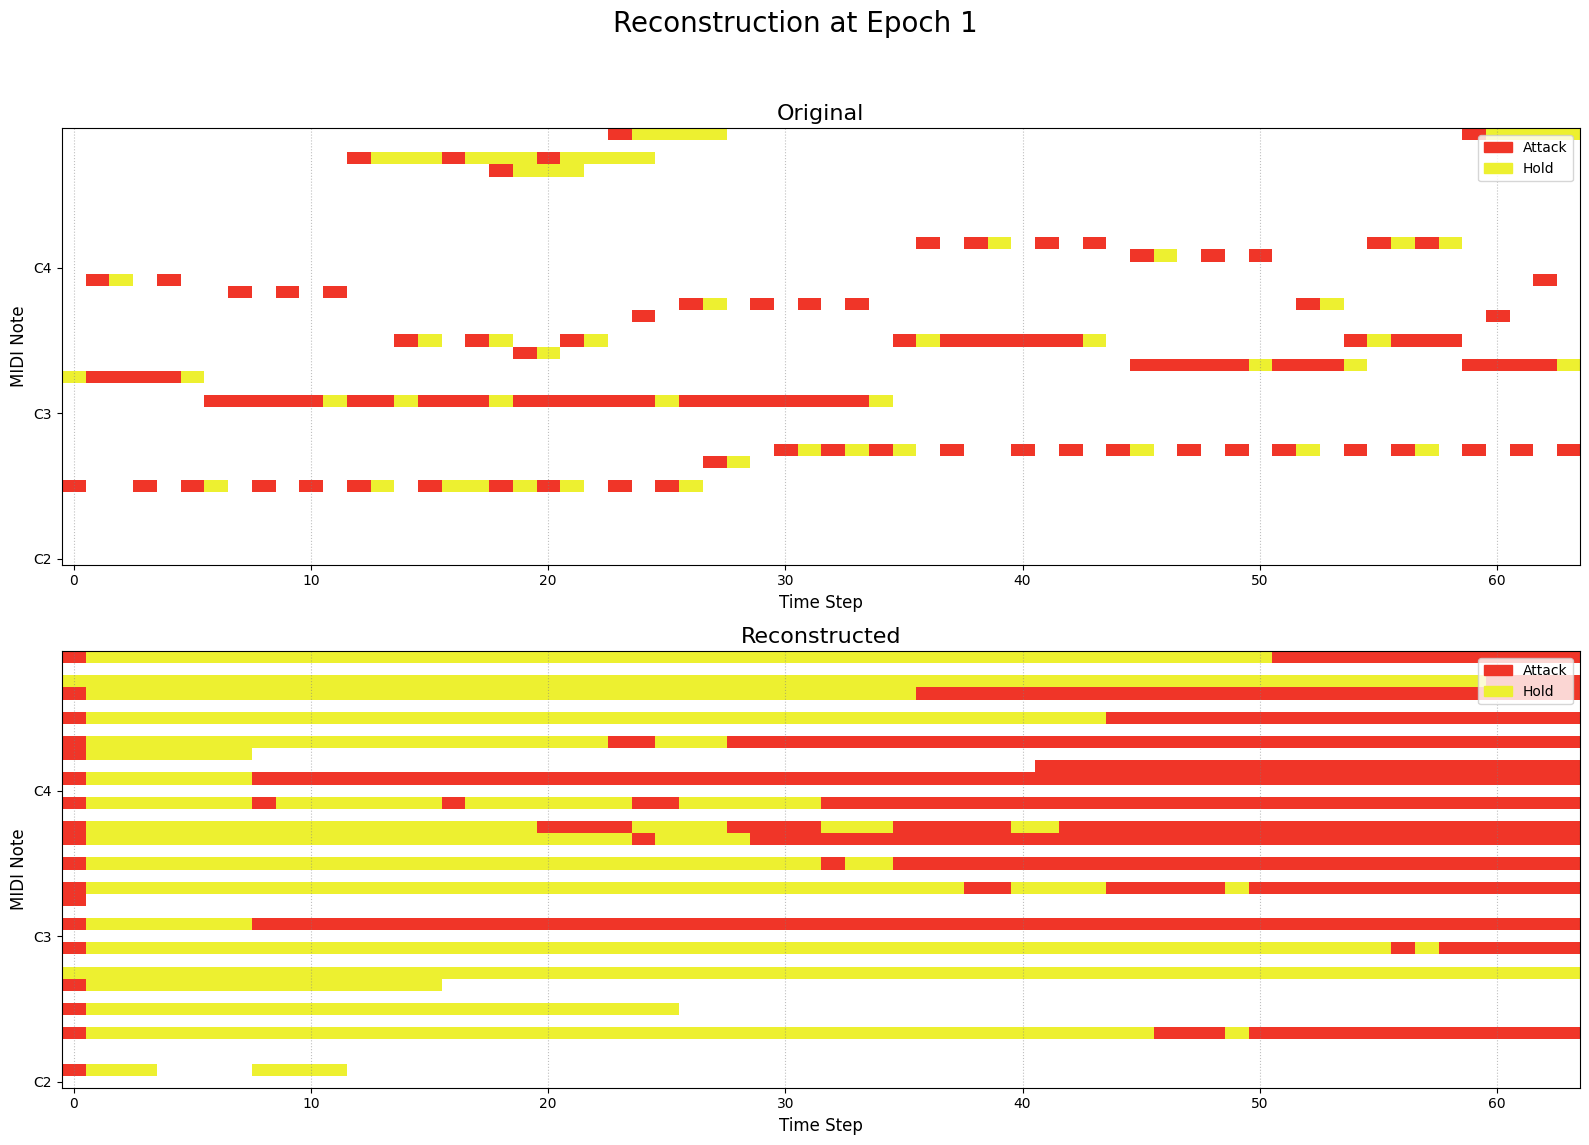

____________________________________________________________ 



Epoch 2/200 [Training]: 100%|██████████| 2797/2797 [01:57<00:00, 23.89it/s, Loss=0.8317, Recon=0.8317, KL=2.5896, beta=0.0000]



Epoch 2 Summary: Avg Train Loss: 0.8601, Avg Val Loss: 1.3501


Epoch 3/200 [Training]: 100%|██████████| 2797/2797 [01:58<00:00, 23.60it/s, Loss=0.7976, Recon=0.7976, KL=3.3562, beta=0.0000]



Epoch 3 Summary: Avg Train Loss: 0.8029, Avg Val Loss: 1.4602


Epoch 4/200 [Training]: 100%|██████████| 2797/2797 [01:58<00:00, 23.59it/s, Loss=0.7324, Recon=0.7324, KL=4.0086, beta=0.0000]



Epoch 4 Summary: Avg Train Loss: 0.7414, Avg Val Loss: 1.5567


Epoch 5/200 [Training]: 100%|██████████| 2797/2797 [01:59<00:00, 23.35it/s, Loss=0.6756, Recon=0.6756, KL=4.3092, beta=0.0000]



Epoch 5 Summary: Avg Train Loss: 0.6930, Avg Val Loss: 1.6075
Checkpoint saved to checkpoints/lofi_model_epoch_5.pth


Epoch 6/200 [Training]: 100%|██████████| 2797/2797 [02:00<00:00, 23.29it/s, Loss=0.6171, Recon=0.6171, KL=4.4855, beta=0.0000]



Epoch 6 Summary: Avg Train Loss: 0.6558, Avg Val Loss: 1.6376


Epoch 7/200 [Training]: 100%|██████████| 2797/2797 [01:59<00:00, 23.36it/s, Loss=0.6402, Recon=0.6402, KL=4.7834, beta=0.0000]



Epoch 7 Summary: Avg Train Loss: 0.6253, Avg Val Loss: 1.6595


Epoch 8/200 [Training]: 100%|██████████| 2797/2797 [02:00<00:00, 23.25it/s, Loss=0.6280, Recon=0.6280, KL=5.0458, beta=0.0000]



Epoch 8 Summary: Avg Train Loss: 0.5977, Avg Val Loss: 1.7126


Epoch 9/200 [Training]: 100%|██████████| 2797/2797 [02:01<00:00, 22.98it/s, Loss=0.5594, Recon=0.5594, KL=5.2707, beta=0.0000]



Epoch 9 Summary: Avg Train Loss: 0.5829, Avg Val Loss: 1.7460


Epoch 10/200 [Training]: 100%|██████████| 2797/2797 [01:58<00:00, 23.55it/s, Loss=0.5498, Recon=0.5498, KL=5.3964, beta=0.0000]



Epoch 10 Summary: Avg Train Loss: 0.5704, Avg Val Loss: 1.7665
Checkpoint saved to checkpoints/lofi_model_epoch_10.pth

Generating visualization for epoch 10:
Converting tensor to MIDI file at reconstructed/reconstructed.mid...
MIDI file saved successfully.


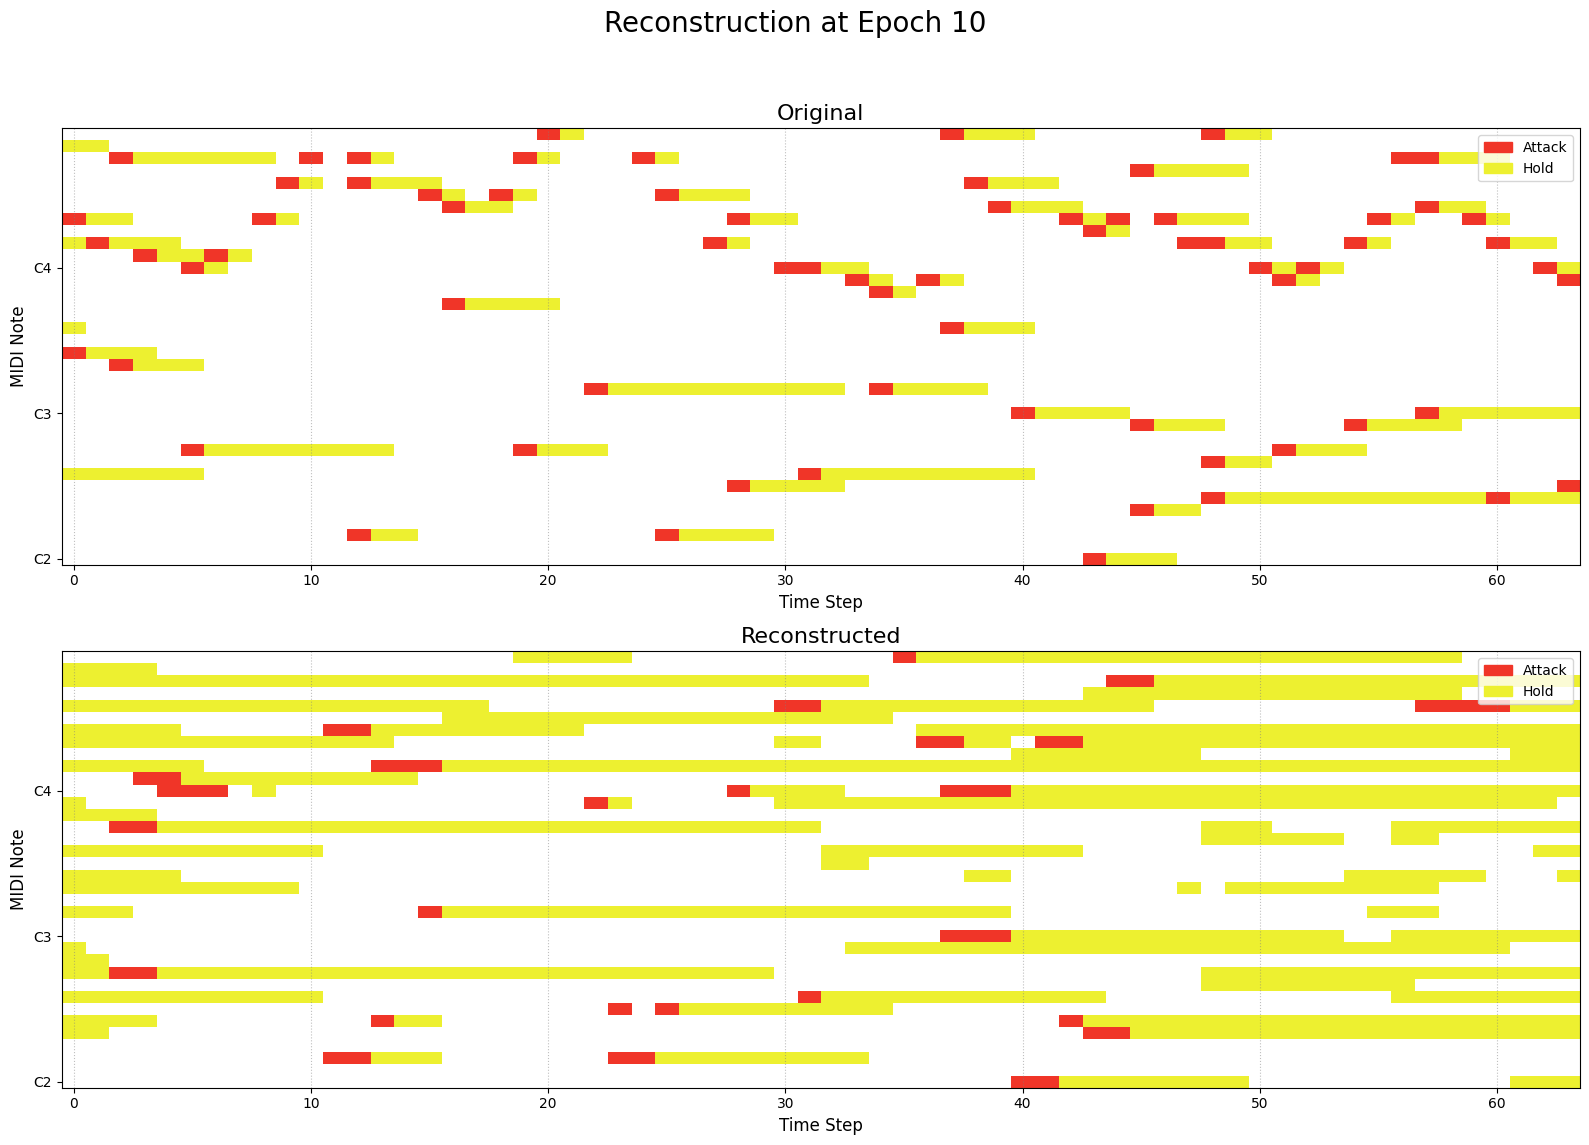

____________________________________________________________ 



Epoch 11/200 [Training]: 100%|██████████| 2797/2797 [02:00<00:00, 23.24it/s, Loss=0.5702, Recon=0.5530, KL=1.9567, beta=0.0127]



Epoch 11 Summary: Avg Train Loss: 0.5835, Avg Val Loss: 0.9019


Epoch 12/200 [Training]: 100%|██████████| 2797/2797 [02:01<00:00, 23.04it/s, Loss=0.5961, Recon=0.5785, KL=1.7465, beta=0.0154]



Epoch 12 Summary: Avg Train Loss: 0.5759, Avg Val Loss: 0.8491


Epoch 13/200 [Training]: 100%|██████████| 2797/2797 [01:59<00:00, 23.38it/s, Loss=0.6236, Recon=0.6046, KL=1.6494, beta=0.0181]



Epoch 13 Summary: Avg Train Loss: 0.5695, Avg Val Loss: 0.8056


Epoch 14/200 [Training]: 100%|██████████| 2797/2797 [02:00<00:00, 23.20it/s, Loss=0.5062, Recon=0.4893, KL=1.4147, beta=0.0207]



Epoch 14 Summary: Avg Train Loss: 0.5633, Avg Val Loss: 0.7674


Epoch 15/200 [Training]: 100%|██████████| 2797/2797 [02:03<00:00, 22.56it/s, Loss=0.5319, Recon=0.5137, KL=1.3779, beta=0.0234]



Epoch 15 Summary: Avg Train Loss: 0.5574, Avg Val Loss: 0.7396
Checkpoint saved to checkpoints/lofi_model_epoch_15.pth


Epoch 16/200 [Training]: 100%|██████████| 2797/2797 [02:00<00:00, 23.19it/s, Loss=0.5835, Recon=0.5640, KL=1.3458, beta=0.0261]



Epoch 16 Summary: Avg Train Loss: 0.5516, Avg Val Loss: 0.7177


Epoch 17/200 [Training]: 100%|██████████| 2797/2797 [02:01<00:00, 22.95it/s, Loss=0.5392, Recon=0.5204, KL=1.2533, beta=0.0288]



Epoch 17 Summary: Avg Train Loss: 0.5458, Avg Val Loss: 0.6931


Epoch 18/200 [Training]: 100%|██████████| 2797/2797 [02:01<00:00, 23.10it/s, Loss=0.4890, Recon=0.4720, KL=1.1393, beta=0.0315]



Epoch 18 Summary: Avg Train Loss: 0.5403, Avg Val Loss: 0.6778


Epoch 19/200 [Training]: 100%|██████████| 2797/2797 [02:00<00:00, 23.13it/s, Loss=0.5419, Recon=0.5236, KL=1.1361, beta=0.0342]



Epoch 19 Summary: Avg Train Loss: 0.5352, Avg Val Loss: 0.6585


Epoch 20/200 [Training]: 100%|██████████| 2797/2797 [02:00<00:00, 23.23it/s, Loss=0.4681, Recon=0.4484, KL=1.1359, beta=0.0369]



Epoch 20 Summary: Avg Train Loss: 0.5301, Avg Val Loss: 0.6485
Checkpoint saved to checkpoints/lofi_model_epoch_20.pth

Generating visualization for epoch 20:
Converting tensor to MIDI file at reconstructed/reconstructed.mid...
MIDI file saved successfully.


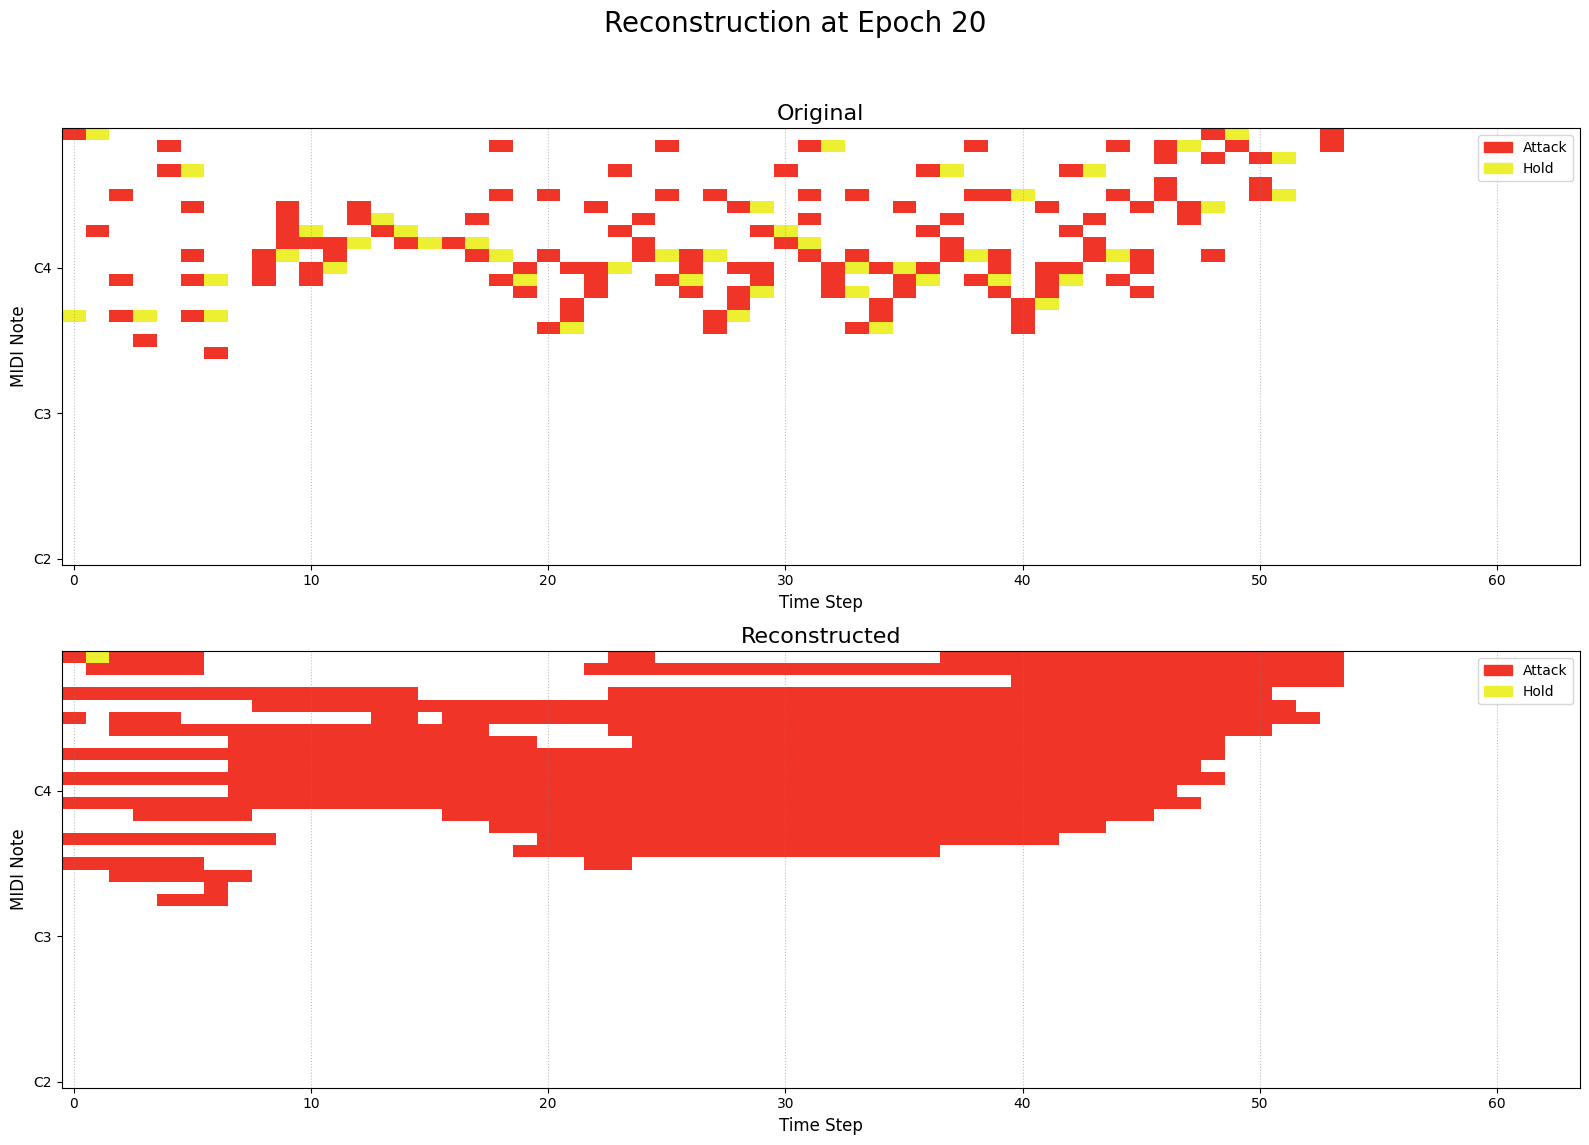

____________________________________________________________ 



Epoch 21/200 [Training]: 100%|██████████| 2797/2797 [02:06<00:00, 22.13it/s, Loss=0.4914, Recon=0.4740, KL=1.0421, beta=0.0395]



Epoch 21 Summary: Avg Train Loss: 0.5251, Avg Val Loss: 0.6316


Epoch 22/200 [Training]: 100%|██████████| 2797/2797 [02:17<00:00, 20.36it/s, Loss=0.5341, Recon=0.5168, KL=1.0082, beta=0.0422]



Epoch 22 Summary: Avg Train Loss: 0.5202, Avg Val Loss: 0.6191


Epoch 23/200 [Training]: 100%|██████████| 2797/2797 [02:08<00:00, 21.76it/s, Loss=0.5145, Recon=0.4954, KL=1.0253, beta=0.0449]



Epoch 23 Summary: Avg Train Loss: 0.5153, Avg Val Loss: 0.6070


Epoch 24/200 [Training]: 100%|██████████| 2797/2797 [02:01<00:00, 23.00it/s, Loss=0.4890, Recon=0.4714, KL=0.9693, beta=0.0476]



Epoch 24 Summary: Avg Train Loss: 0.5105, Avg Val Loss: 0.5981


Epoch 25/200 [Training]: 100%|██████████| 2797/2797 [02:01<00:00, 23.06it/s, Loss=0.5249, Recon=0.5075, KL=0.9456, beta=0.0503]



Epoch 25 Summary: Avg Train Loss: 0.5058, Avg Val Loss: 0.5887
Checkpoint saved to checkpoints/lofi_model_epoch_25.pth


Epoch 26/200 [Training]: 100%|██████████| 2797/2797 [02:03<00:00, 22.64it/s, Loss=0.4828, Recon=0.4641, KL=0.9540, beta=0.0530]



Epoch 26 Summary: Avg Train Loss: 0.5010, Avg Val Loss: 0.5775


Epoch 27/200 [Training]: 100%|██████████| 2797/2797 [02:02<00:00, 22.88it/s, Loss=0.5268, Recon=0.5109, KL=0.8863, beta=0.0556]



Epoch 27 Summary: Avg Train Loss: 0.4961, Avg Val Loss: 0.5673


Epoch 28/200 [Training]: 100%|██████████| 2797/2797 [02:01<00:00, 22.94it/s, Loss=0.5191, Recon=0.5007, KL=0.9167, beta=0.0583]



Epoch 28 Summary: Avg Train Loss: 0.4913, Avg Val Loss: 0.5576


Epoch 29/200 [Training]: 100%|██████████| 2797/2797 [02:14<00:00, 20.77it/s, Loss=0.5191, Recon=0.5033, KL=0.8590, beta=0.0610]



Epoch 29 Summary: Avg Train Loss: 0.4866, Avg Val Loss: 0.5486


Epoch 30/200 [Training]: 100%|██████████| 2797/2797 [02:16<00:00, 20.54it/s, Loss=0.4977, Recon=0.4809, KL=0.8644, beta=0.0637]



Epoch 30 Summary: Avg Train Loss: 0.4819, Avg Val Loss: 0.5412
Checkpoint saved to checkpoints/lofi_model_epoch_30.pth

Generating visualization for epoch 30:
Converting tensor to MIDI file at reconstructed/reconstructed.mid...
MIDI file saved successfully.


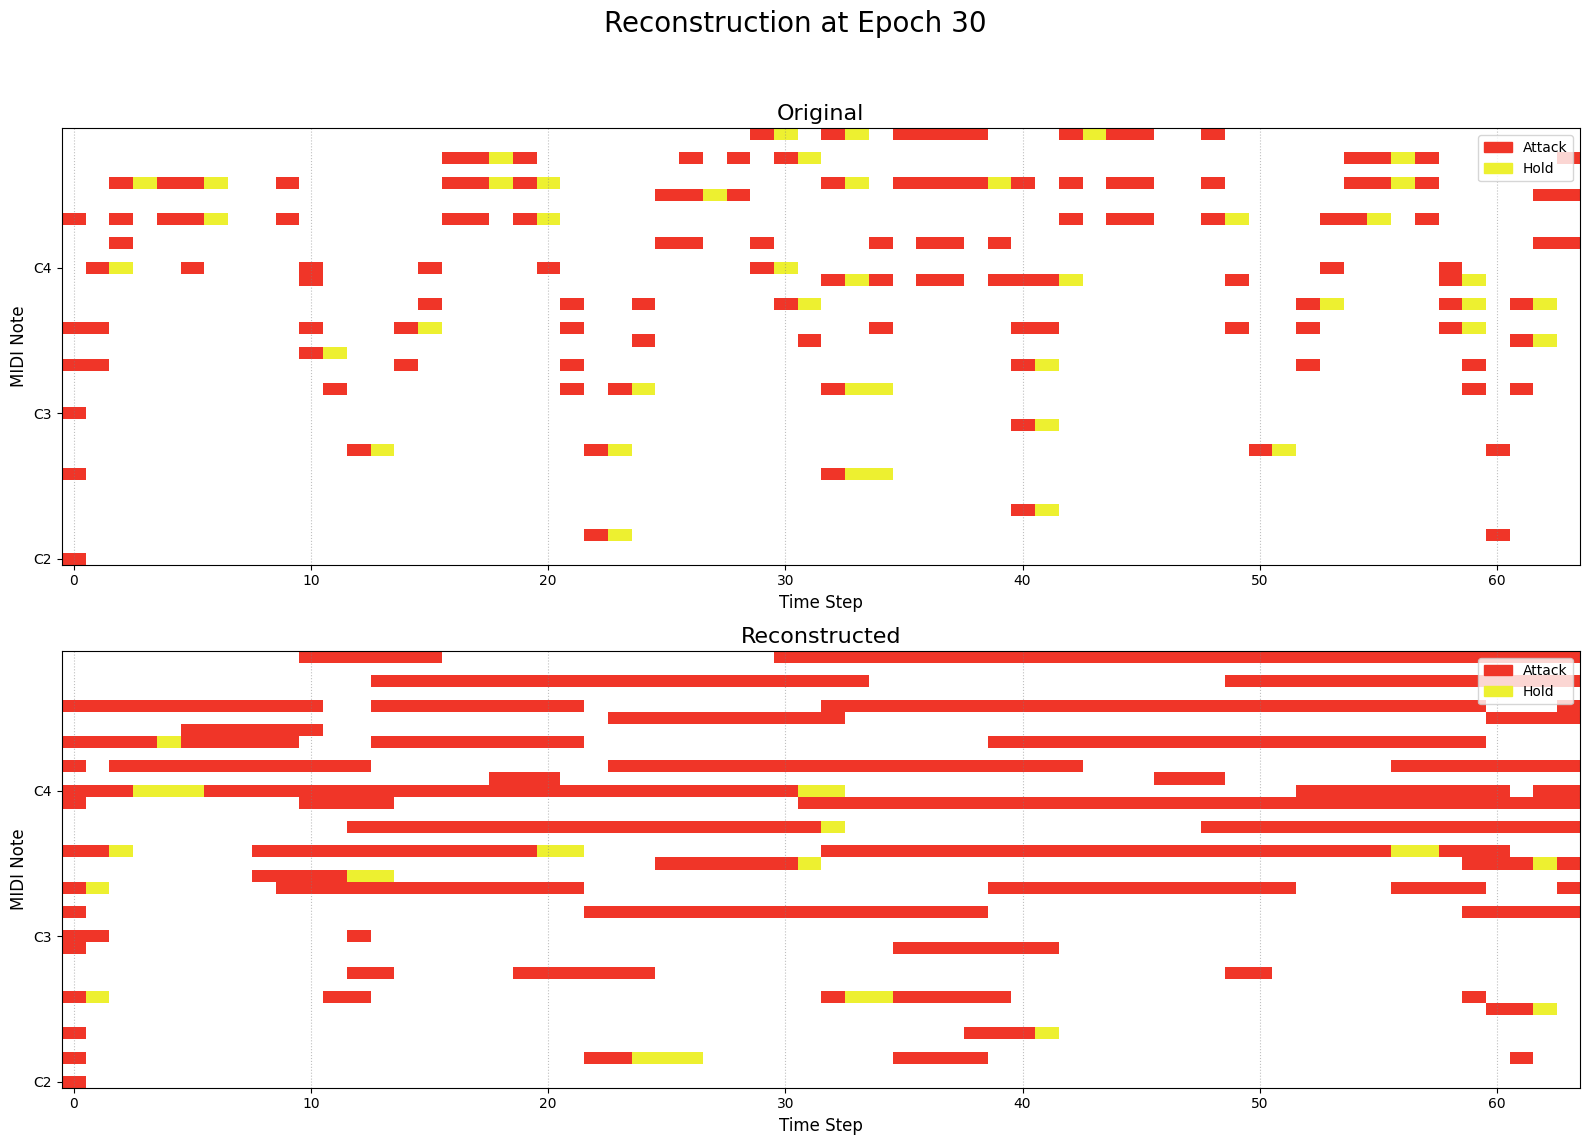

____________________________________________________________ 



Epoch 31/200 [Training]: 100%|██████████| 2797/2797 [02:12<00:00, 21.07it/s, Loss=0.4718, Recon=0.4555, KL=0.8461, beta=0.0664]



Epoch 31 Summary: Avg Train Loss: 0.4773, Avg Val Loss: 0.5365


Epoch 32/200 [Training]: 100%|██████████| 2797/2797 [02:16<00:00, 20.54it/s, Loss=0.5238, Recon=0.5061, KL=0.8561, beta=0.0691]



Epoch 32 Summary: Avg Train Loss: 0.4727, Avg Val Loss: 0.5266


Epoch 33/200 [Training]: 100%|██████████| 2797/2797 [02:10<00:00, 21.44it/s, Loss=0.4823, Recon=0.4656, KL=0.8318, beta=0.0718]



Epoch 33 Summary: Avg Train Loss: 0.4685, Avg Val Loss: 0.5184


Epoch 34/200 [Training]: 100%|██████████| 2797/2797 [02:09<00:00, 21.65it/s, Loss=0.4588, Recon=0.4455, KL=0.7793, beta=0.0744]



Epoch 34 Summary: Avg Train Loss: 0.4641, Avg Val Loss: 0.5133


Epoch 35/200 [Training]: 100%|██████████| 2797/2797 [02:09<00:00, 21.59it/s, Loss=0.4484, Recon=0.4330, KL=0.8007, beta=0.0771]



Epoch 35 Summary: Avg Train Loss: 0.4599, Avg Val Loss: 0.5087
Checkpoint saved to checkpoints/lofi_model_epoch_35.pth


Epoch 36/200 [Training]: 100%|██████████| 2797/2797 [02:12<00:00, 21.11it/s, Loss=0.4872, Recon=0.4742, KL=0.7625, beta=0.0798]



Epoch 36 Summary: Avg Train Loss: 0.4557, Avg Val Loss: 0.4990


Epoch 37/200 [Training]: 100%|██████████| 2797/2797 [02:13<00:00, 20.98it/s, Loss=0.4096, Recon=0.3974, KL=0.7486, beta=0.0825]



Epoch 37 Summary: Avg Train Loss: 0.4516, Avg Val Loss: 0.4947


Epoch 38/200 [Training]: 100%|██████████| 2797/2797 [02:01<00:00, 22.97it/s, Loss=0.4215, Recon=0.4084, KL=0.7542, beta=0.0852]



Epoch 38 Summary: Avg Train Loss: 0.4478, Avg Val Loss: 0.4905


Epoch 39/200 [Training]: 100%|██████████| 2797/2797 [02:04<00:00, 22.53it/s, Loss=0.4650, Recon=0.4532, KL=0.7339, beta=0.0879]



Epoch 39 Summary: Avg Train Loss: 0.4439, Avg Val Loss: 0.4856


Epoch 40/200 [Training]: 100%|██████████| 2797/2797 [02:00<00:00, 23.29it/s, Loss=0.4436, Recon=0.4312, KL=0.7376, beta=0.0906]



Epoch 40 Summary: Avg Train Loss: 0.4402, Avg Val Loss: 0.4804
Checkpoint saved to checkpoints/lofi_model_epoch_40.pth

Generating visualization for epoch 40:
Converting tensor to MIDI file at reconstructed/reconstructed.mid...
MIDI file saved successfully.


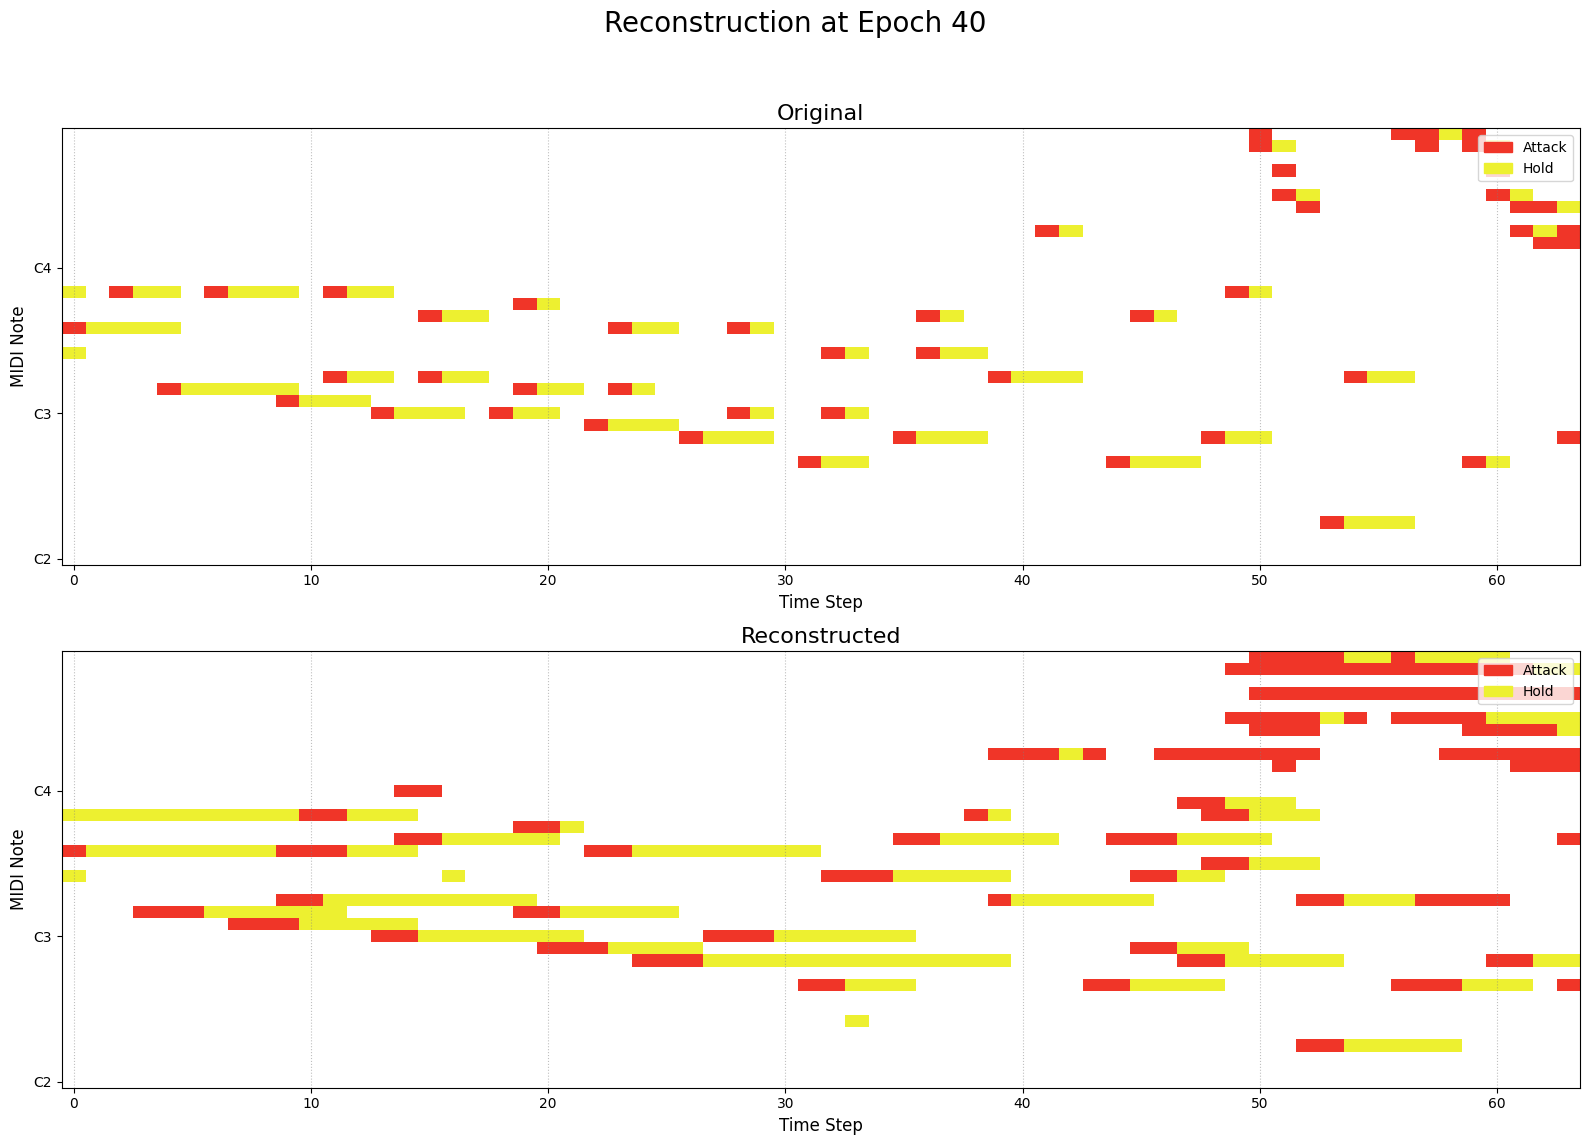

____________________________________________________________ 



Epoch 41/200 [Training]: 100%|██████████| 2797/2797 [02:02<00:00, 22.90it/s, Loss=0.4155, Recon=0.4028, KL=0.7362, beta=0.0932]



Epoch 41 Summary: Avg Train Loss: 0.4364, Avg Val Loss: 0.4751


Epoch 42/200 [Training]: 100%|██████████| 2797/2797 [02:04<00:00, 22.55it/s, Loss=0.4912, Recon=0.4792, KL=0.7249, beta=0.0959]



Epoch 42 Summary: Avg Train Loss: 0.4329, Avg Val Loss: 0.4699


Epoch 43/200 [Training]: 100%|██████████| 2797/2797 [02:00<00:00, 23.31it/s, Loss=0.3399, Recon=0.3286, KL=0.7151, beta=0.0986]



Epoch 43 Summary: Avg Train Loss: 0.4296, Avg Val Loss: 0.4656


Epoch 44/200 [Training]: 100%|██████████| 2797/2797 [02:00<00:00, 23.22it/s, Loss=0.3715, Recon=0.3633, KL=0.6810, beta=0.1013]



Epoch 44 Summary: Avg Train Loss: 0.4262, Avg Val Loss: 0.4635


Epoch 45/200 [Training]: 100%|██████████| 2797/2797 [02:01<00:00, 23.06it/s, Loss=0.4549, Recon=0.4446, KL=0.6995, beta=0.1040]



Epoch 45 Summary: Avg Train Loss: 0.4228, Avg Val Loss: 0.4578
Checkpoint saved to checkpoints/lofi_model_epoch_45.pth


Epoch 46/200 [Training]: 100%|██████████| 2797/2797 [02:01<00:00, 23.09it/s, Loss=0.4036, Recon=0.3923, KL=0.7059, beta=0.1067]



Epoch 46 Summary: Avg Train Loss: 0.4196, Avg Val Loss: 0.4536


Epoch 47/200 [Training]: 100%|██████████| 2797/2797 [02:03<00:00, 22.61it/s, Loss=0.4684, Recon=0.4601, KL=0.6756, beta=0.1093]



Epoch 47 Summary: Avg Train Loss: 0.4164, Avg Val Loss: 0.4495


Epoch 48/200 [Training]: 100%|██████████| 2797/2797 [02:02<00:00, 22.86it/s, Loss=0.3990, Recon=0.3970, KL=0.6181, beta=0.1120]



Epoch 48 Summary: Avg Train Loss: 0.4134, Avg Val Loss: 0.4466


Epoch 49/200 [Training]: 100%|██████████| 2797/2797 [02:01<00:00, 23.05it/s, Loss=0.4320, Recon=0.4229, KL=0.6791, beta=0.1147]



Epoch 49 Summary: Avg Train Loss: 0.4104, Avg Val Loss: 0.4456


Epoch 50/200 [Training]: 100%|██████████| 2797/2797 [02:03<00:00, 22.58it/s, Loss=0.4194, Recon=0.4068, KL=0.7073, beta=0.1174]



Epoch 50 Summary: Avg Train Loss: 0.4074, Avg Val Loss: 0.4400
Checkpoint saved to checkpoints/lofi_model_epoch_50.pth

Generating visualization for epoch 50:
Converting tensor to MIDI file at reconstructed/reconstructed.mid...
MIDI file saved successfully.


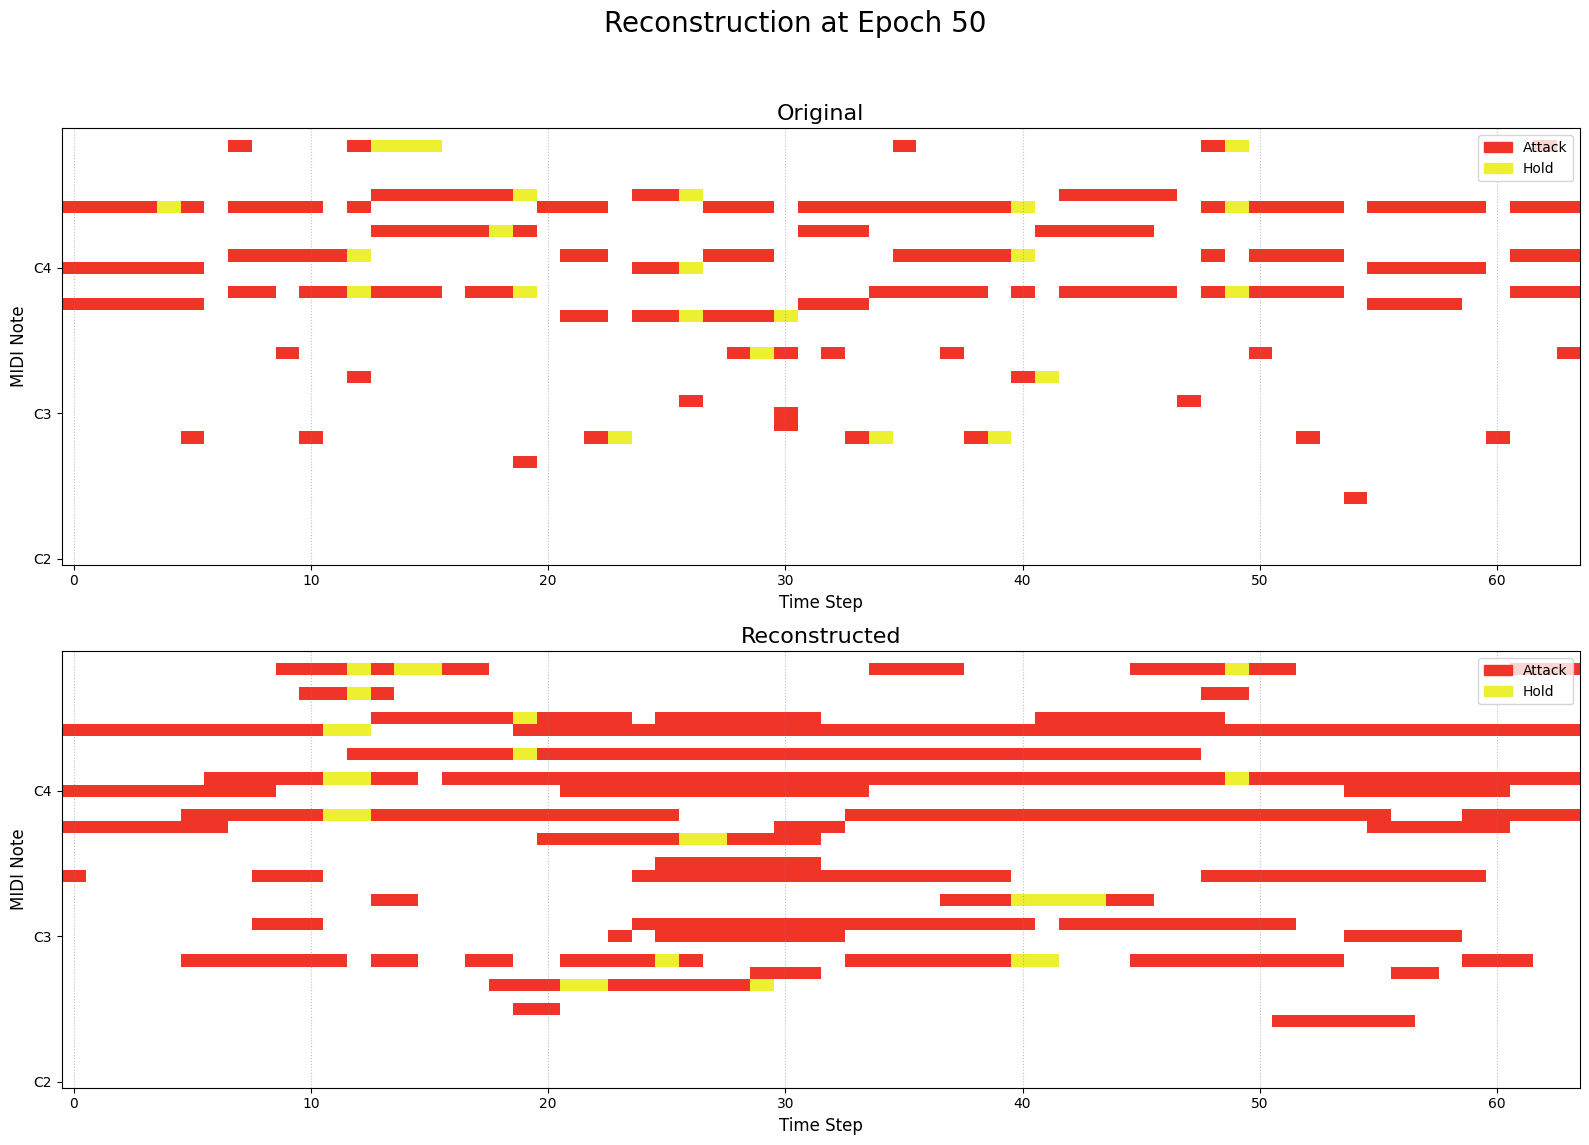

____________________________________________________________ 



Epoch 51/200 [Training]: 100%|██████████| 2797/2797 [02:17<00:00, 20.37it/s, Loss=0.4509, Recon=0.4412, KL=0.6809, beta=0.1201]



Epoch 51 Summary: Avg Train Loss: 0.4046, Avg Val Loss: 0.4381


Epoch 52/200 [Training]: 100%|██████████| 2797/2797 [02:11<00:00, 21.35it/s, Loss=0.4540, Recon=0.4460, KL=0.6655, beta=0.1228]



Epoch 52 Summary: Avg Train Loss: 0.4017, Avg Val Loss: 0.4339


Epoch 53/200 [Training]: 100%|██████████| 2797/2797 [02:02<00:00, 22.83it/s, Loss=0.4038, Recon=0.3975, KL=0.6508, beta=0.1255]



Epoch 53 Summary: Avg Train Loss: 0.3989, Avg Val Loss: 0.4315


Epoch 54/200 [Training]: 100%|██████████| 2797/2797 [02:02<00:00, 22.75it/s, Loss=0.3476, Recon=0.3416, KL=0.6468, beta=0.1281]



Epoch 54 Summary: Avg Train Loss: 0.3961, Avg Val Loss: 0.4292


Epoch 55/200 [Training]: 100%|██████████| 2797/2797 [02:03<00:00, 22.64it/s, Loss=0.4359, Recon=0.4277, KL=0.6628, beta=0.1308]



Epoch 55 Summary: Avg Train Loss: 0.3935, Avg Val Loss: 0.4257
Checkpoint saved to checkpoints/lofi_model_epoch_55.pth


Epoch 56/200 [Training]: 100%|██████████| 2797/2797 [02:04<00:00, 22.45it/s, Loss=0.4608, Recon=0.4532, KL=0.6566, beta=0.1335]



Epoch 56 Summary: Avg Train Loss: 0.3908, Avg Val Loss: 0.4228


Epoch 57/200 [Training]: 100%|██████████| 2797/2797 [02:16<00:00, 20.48it/s, Loss=0.3907, Recon=0.3875, KL=0.6238, beta=0.1362]



Epoch 57 Summary: Avg Train Loss: 0.3884, Avg Val Loss: 0.4217


Epoch 58/200 [Training]: 100%|██████████| 2797/2797 [02:12<00:00, 21.19it/s, Loss=0.3534, Recon=0.3510, KL=0.6171, beta=0.1389]



Epoch 58 Summary: Avg Train Loss: 0.3859, Avg Val Loss: 0.4191


Epoch 59/200 [Training]: 100%|██████████| 2797/2797 [02:07<00:00, 21.97it/s, Loss=0.3702, Recon=0.3627, KL=0.6531, beta=0.1416]



Epoch 59 Summary: Avg Train Loss: 0.3835, Avg Val Loss: 0.4173


Epoch 60/200 [Training]: 100%|██████████| 2797/2797 [02:04<00:00, 22.50it/s, Loss=0.3955, Recon=0.3935, KL=0.6142, beta=0.1443]



Epoch 60 Summary: Avg Train Loss: 0.3810, Avg Val Loss: 0.4133
Checkpoint saved to checkpoints/lofi_model_epoch_60.pth

Generating visualization for epoch 60:
Converting tensor to MIDI file at reconstructed/reconstructed.mid...
MIDI file saved successfully.


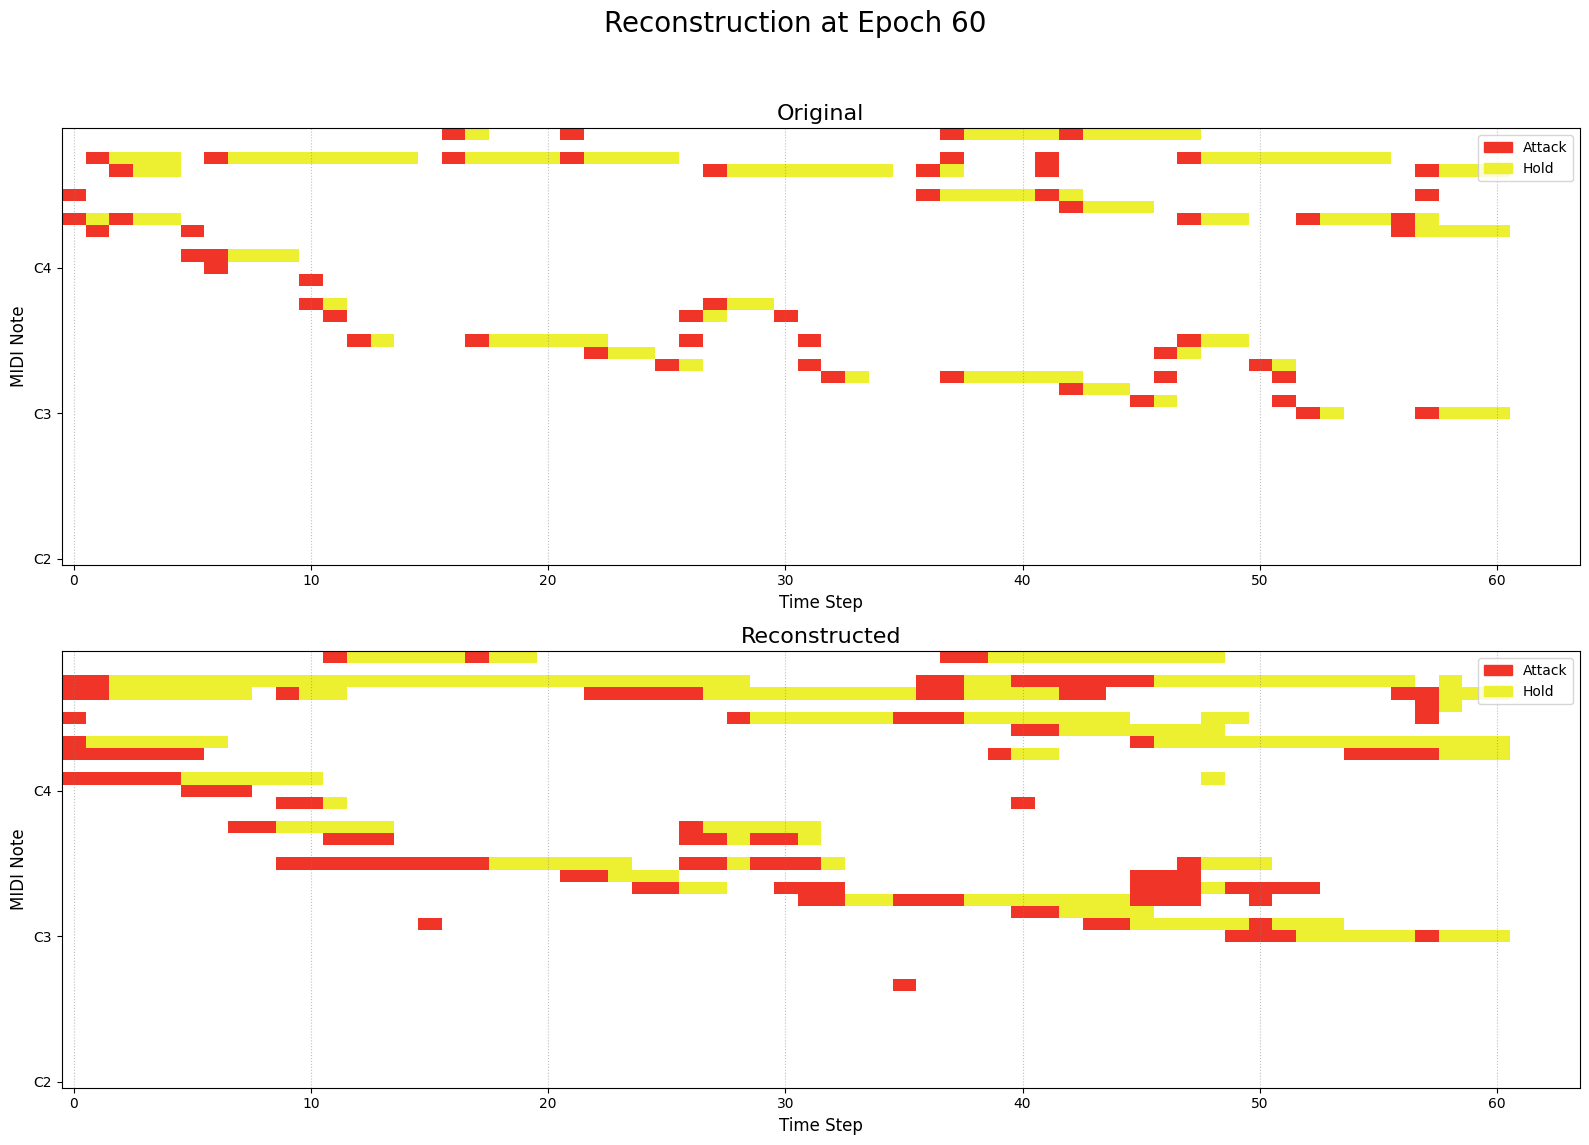

____________________________________________________________ 



Epoch 61/200 [Training]: 100%|██████████| 2797/2797 [02:05<00:00, 22.37it/s, Loss=0.3704, Recon=0.3641, KL=0.6428, beta=0.1469]



Epoch 61 Summary: Avg Train Loss: 0.3786, Avg Val Loss: 0.4141


Epoch 62/200 [Training]: 100%|██████████| 2797/2797 [02:00<00:00, 23.30it/s, Loss=0.3448, Recon=0.3369, KL=0.6526, beta=0.1496]



Epoch 62 Summary: Avg Train Loss: 0.3762, Avg Val Loss: 0.4104


Epoch 63/200 [Training]: 100%|██████████| 2797/2797 [02:01<00:00, 23.04it/s, Loss=0.3985, Recon=0.3961, KL=0.6161, beta=0.1523]



Epoch 63 Summary: Avg Train Loss: 0.3738, Avg Val Loss: 0.4075


Epoch 64/200 [Training]: 100%|██████████| 2797/2797 [02:00<00:00, 23.23it/s, Loss=0.4075, Recon=0.4050, KL=0.6165, beta=0.1550]



Epoch 64 Summary: Avg Train Loss: 0.3715, Avg Val Loss: 0.4076


Epoch 65/200 [Training]: 100%|██████████| 2797/2797 [02:01<00:00, 23.10it/s, Loss=0.3949, Recon=0.3892, KL=0.6359, beta=0.1577]



Epoch 65 Summary: Avg Train Loss: 0.3693, Avg Val Loss: 0.4067
Checkpoint saved to checkpoints/lofi_model_epoch_65.pth


Epoch 66/200 [Training]: 100%|██████████| 2797/2797 [02:01<00:00, 23.00it/s, Loss=0.3369, Recon=0.3369, KL=0.5993, beta=0.1604]



Epoch 66 Summary: Avg Train Loss: 0.3671, Avg Val Loss: 0.4027


Epoch 67/200 [Training]: 100%|██████████| 2797/2797 [02:01<00:00, 22.97it/s, Loss=0.3669, Recon=0.3644, KL=0.6157, beta=0.1631]



Epoch 67 Summary: Avg Train Loss: 0.3649, Avg Val Loss: 0.4023


Epoch 68/200 [Training]: 100%|██████████| 2797/2797 [01:58<00:00, 23.52it/s, Loss=0.3439, Recon=0.3420, KL=0.6114, beta=0.1657]



Epoch 68 Summary: Avg Train Loss: 0.3628, Avg Val Loss: 0.4002


Epoch 69/200 [Training]: 100%|██████████| 2797/2797 [02:01<00:00, 23.05it/s, Loss=0.3391, Recon=0.3362, KL=0.6173, beta=0.1684]



Epoch 69 Summary: Avg Train Loss: 0.3609, Avg Val Loss: 0.3997


Epoch 70/200 [Training]: 100%|██████████| 2797/2797 [01:59<00:00, 23.47it/s, Loss=0.3540, Recon=0.3540, KL=0.5912, beta=0.1711]



Epoch 70 Summary: Avg Train Loss: 0.3589, Avg Val Loss: 0.3976
Checkpoint saved to checkpoints/lofi_model_epoch_70.pth

Generating visualization for epoch 70:
Converting tensor to MIDI file at reconstructed/reconstructed.mid...
MIDI file saved successfully.


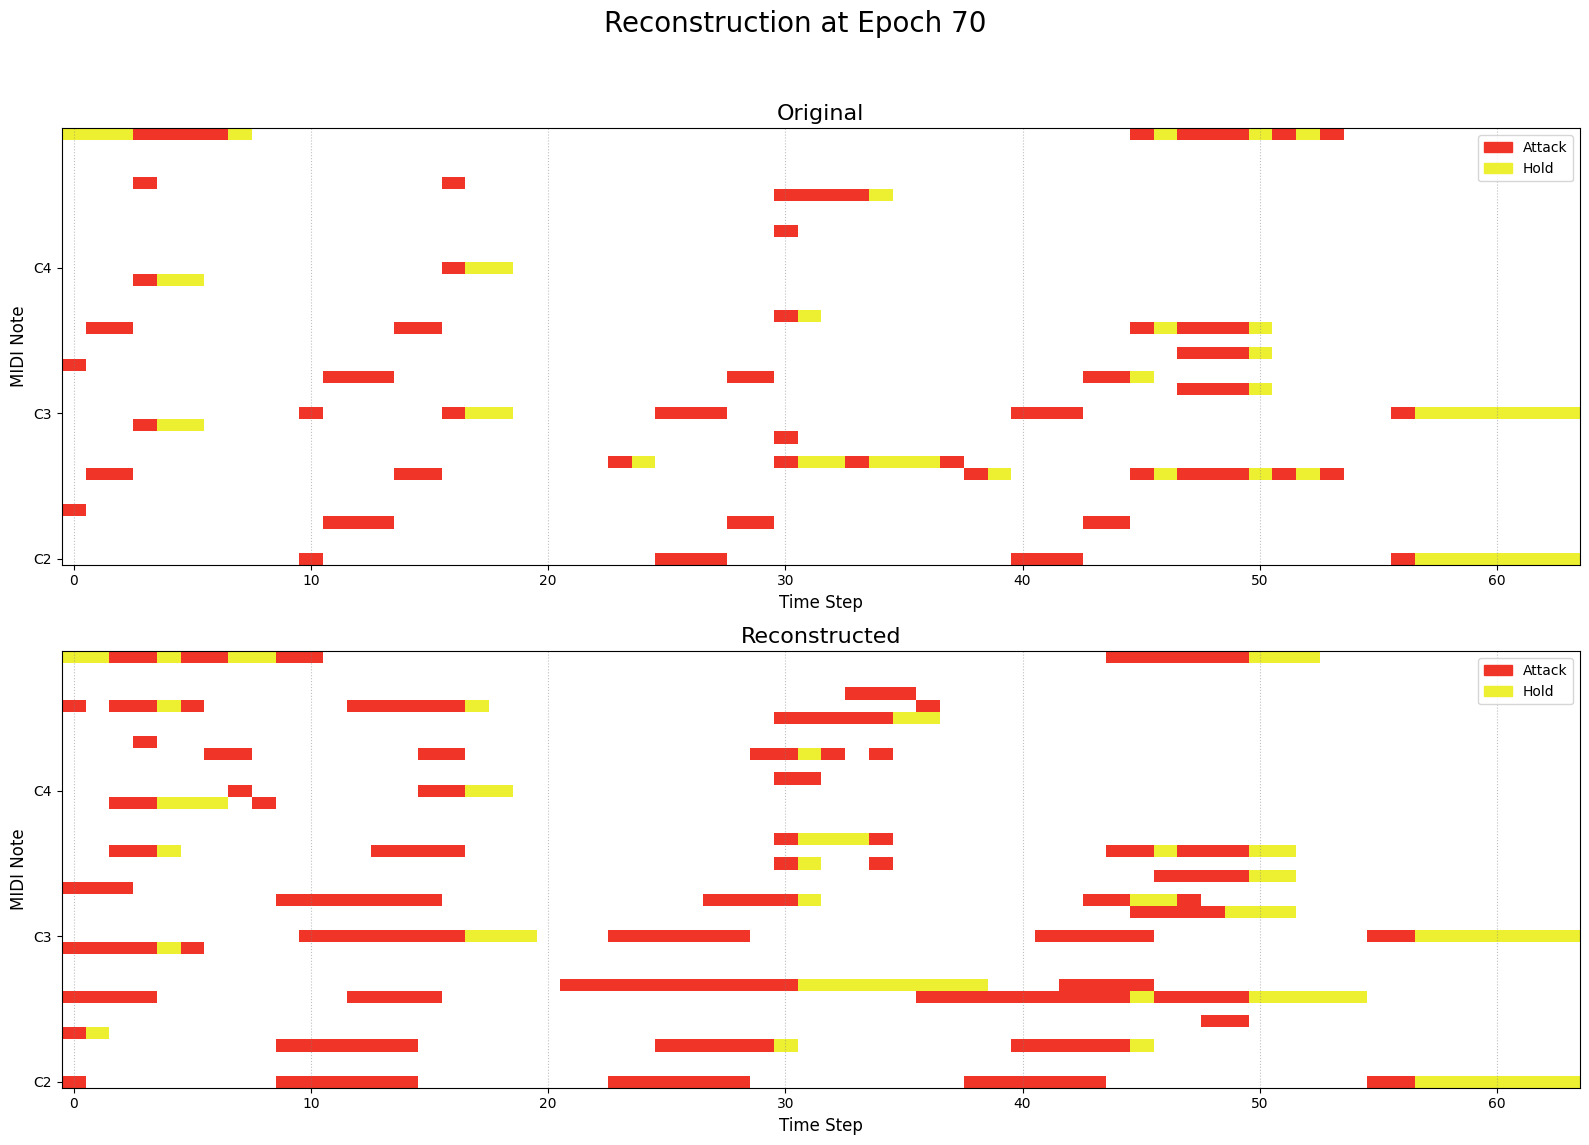

____________________________________________________________ 



Epoch 71/200 [Training]: 100%|██████████| 2797/2797 [02:00<00:00, 23.23it/s, Loss=0.3134, Recon=0.3089, KL=0.6259, beta=0.1738]



Epoch 71 Summary: Avg Train Loss: 0.3570, Avg Val Loss: 0.3963


Epoch 72/200 [Training]: 100%|██████████| 2797/2797 [02:02<00:00, 22.81it/s, Loss=0.3626, Recon=0.3616, KL=0.6057, beta=0.1765]



Epoch 72 Summary: Avg Train Loss: 0.3551, Avg Val Loss: 0.3946


Epoch 73/200 [Training]: 100%|██████████| 2797/2797 [01:59<00:00, 23.40it/s, Loss=0.3418, Recon=0.3347, KL=0.6397, beta=0.1792]



Epoch 73 Summary: Avg Train Loss: 0.3533, Avg Val Loss: 0.3943


Epoch 74/200 [Training]: 100%|██████████| 2797/2797 [01:59<00:00, 23.32it/s, Loss=0.3538, Recon=0.3509, KL=0.6155, beta=0.1818]



Epoch 74 Summary: Avg Train Loss: 0.3515, Avg Val Loss: 0.3944


Epoch 75/200 [Training]: 100%|██████████| 2797/2797 [02:02<00:00, 22.91it/s, Loss=0.3580, Recon=0.3525, KL=0.6298, beta=0.1845]



Epoch 75 Summary: Avg Train Loss: 0.3496, Avg Val Loss: 0.3910
Checkpoint saved to checkpoints/lofi_model_epoch_75.pth


Epoch 76/200 [Training]: 100%|██████████| 2797/2797 [02:01<00:00, 23.00it/s, Loss=0.3445, Recon=0.3407, KL=0.6204, beta=0.1872]



Epoch 76 Summary: Avg Train Loss: 0.3479, Avg Val Loss: 0.3921


Epoch 77/200 [Training]: 100%|██████████| 2797/2797 [02:01<00:00, 22.95it/s, Loss=0.3279, Recon=0.3218, KL=0.6321, beta=0.1899]



Epoch 77 Summary: Avg Train Loss: 0.3462, Avg Val Loss: 0.3905


Epoch 78/200 [Training]: 100%|██████████| 2797/2797 [02:04<00:00, 22.44it/s, Loss=0.3307, Recon=0.3281, KL=0.6134, beta=0.1926]



Epoch 78 Summary: Avg Train Loss: 0.3445, Avg Val Loss: 0.3890


Epoch 79/200 [Training]: 100%|██████████| 2797/2797 [02:01<00:00, 23.06it/s, Loss=0.3256, Recon=0.3256, KL=0.5823, beta=0.1953]



Epoch 79 Summary: Avg Train Loss: 0.3427, Avg Val Loss: 0.3880


Epoch 80/200 [Training]: 100%|██████████| 2797/2797 [02:02<00:00, 22.82it/s, Loss=0.3548, Recon=0.3525, KL=0.6119, beta=0.1980]



Epoch 80 Summary: Avg Train Loss: 0.3411, Avg Val Loss: 0.3869
Checkpoint saved to checkpoints/lofi_model_epoch_80.pth

Generating visualization for epoch 80:
Converting tensor to MIDI file at reconstructed/reconstructed.mid...
MIDI file saved successfully.


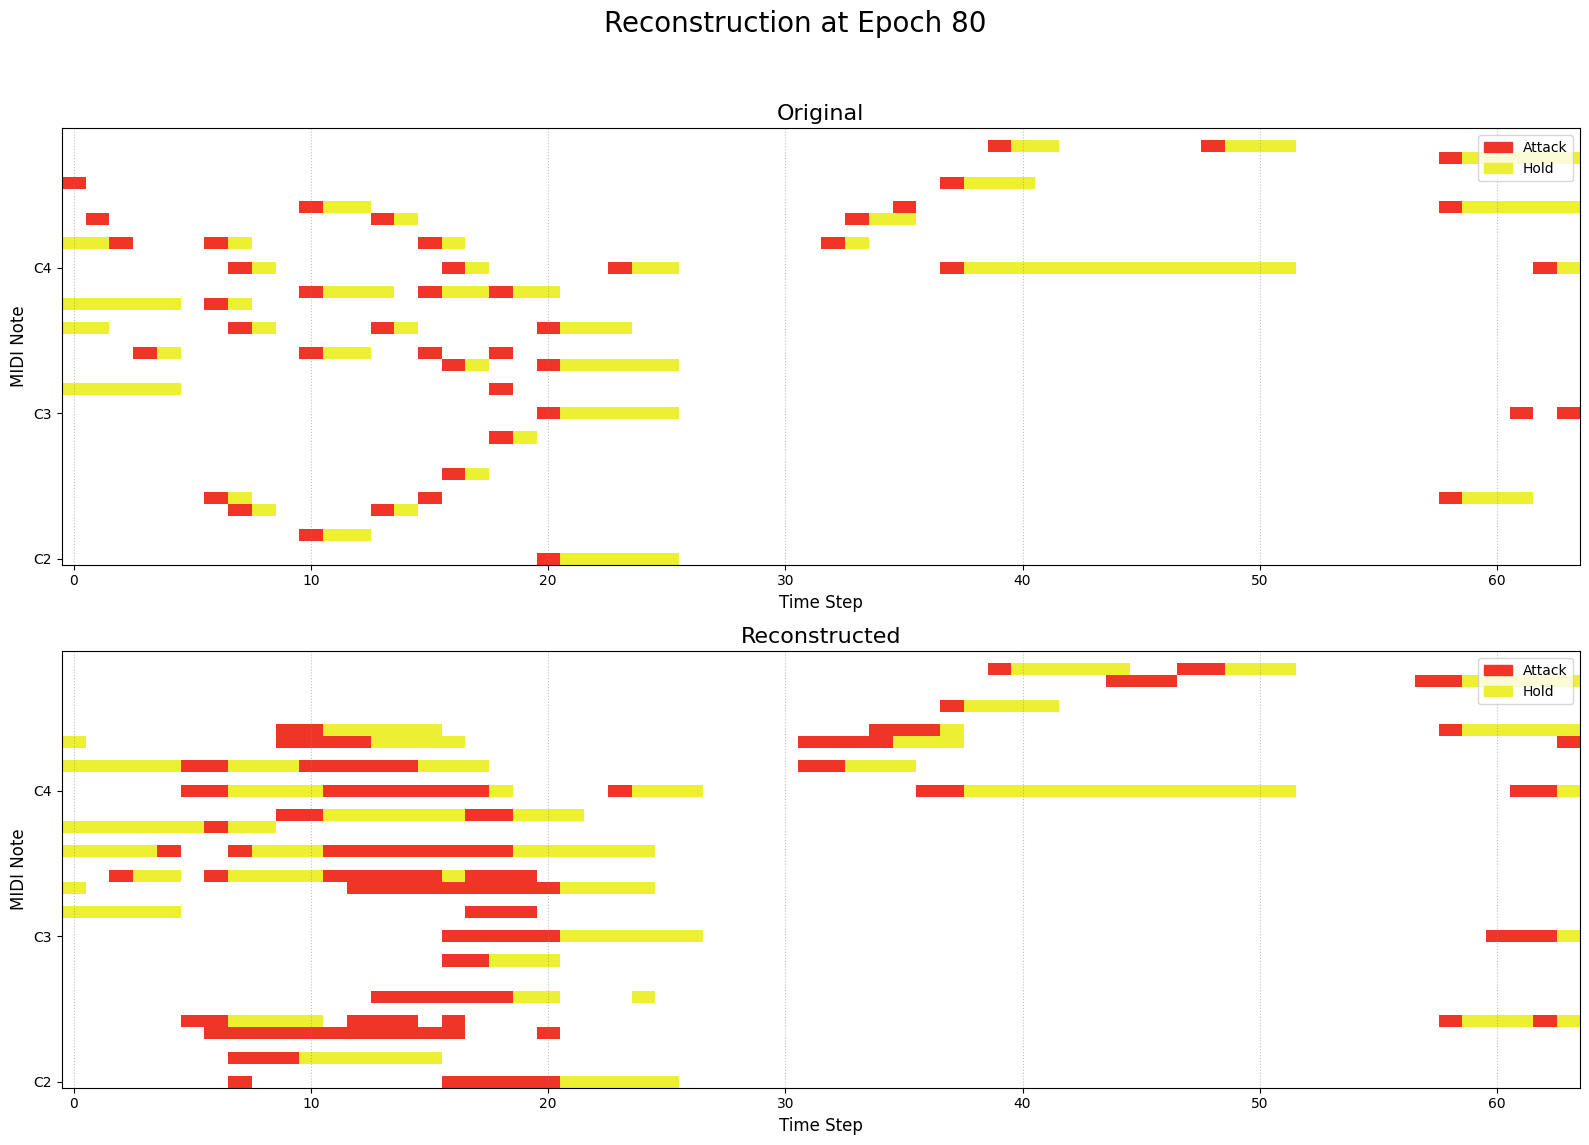

____________________________________________________________ 



Epoch 81/200 [Training]: 100%|██████████| 2797/2797 [02:02<00:00, 22.81it/s, Loss=0.3568, Recon=0.3501, KL=0.6334, beta=0.2006]



Epoch 81 Summary: Avg Train Loss: 0.3395, Avg Val Loss: 0.3859


Epoch 82/200 [Training]: 100%|██████████| 2797/2797 [02:01<00:00, 22.98it/s, Loss=0.3396, Recon=0.3348, KL=0.6236, beta=0.2033]



Epoch 82 Summary: Avg Train Loss: 0.3379, Avg Val Loss: 0.3851


Epoch 83/200 [Training]: 100%|██████████| 2797/2797 [02:02<00:00, 22.92it/s, Loss=0.3634, Recon=0.3604, KL=0.6145, beta=0.2060]



Epoch 83 Summary: Avg Train Loss: 0.3363, Avg Val Loss: 0.3844


Epoch 84/200 [Training]: 100%|██████████| 2797/2797 [02:01<00:00, 23.08it/s, Loss=0.3832, Recon=0.3750, KL=0.6391, beta=0.2087]



Epoch 84 Summary: Avg Train Loss: 0.3346, Avg Val Loss: 0.3830


Epoch 85/200 [Training]: 100%|██████████| 2797/2797 [02:02<00:00, 22.92it/s, Loss=0.3591, Recon=0.3563, KL=0.6135, beta=0.2114]



Epoch 85 Summary: Avg Train Loss: 0.3331, Avg Val Loss: 0.3832
Checkpoint saved to checkpoints/lofi_model_epoch_85.pth


Epoch 86/200 [Training]: 100%|██████████| 2797/2797 [02:02<00:00, 22.87it/s, Loss=0.2452, Recon=0.2452, KL=0.5924, beta=0.2141]



Epoch 86 Summary: Avg Train Loss: 0.3316, Avg Val Loss: 0.3834


Epoch 87/200 [Training]: 100%|██████████| 2797/2797 [01:59<00:00, 23.31it/s, Loss=0.3826, Recon=0.3782, KL=0.6205, beta=0.2168]



Epoch 87 Summary: Avg Train Loss: 0.3302, Avg Val Loss: 0.3816


Epoch 88/200 [Training]: 100%|██████████| 2797/2797 [02:01<00:00, 22.98it/s, Loss=0.3261, Recon=0.3225, KL=0.6165, beta=0.2194]



Epoch 88 Summary: Avg Train Loss: 0.3287, Avg Val Loss: 0.3812


Epoch 89/200 [Training]: 100%|██████████| 2797/2797 [02:03<00:00, 22.70it/s, Loss=0.3384, Recon=0.3376, KL=0.6039, beta=0.2221]



Epoch 89 Summary: Avg Train Loss: 0.3272, Avg Val Loss: 0.3805


Epoch 90/200 [Training]: 100%|██████████| 2797/2797 [02:09<00:00, 21.65it/s, Loss=0.3266, Recon=0.3182, KL=0.6375, beta=0.2248]



Epoch 90 Summary: Avg Train Loss: 0.3258, Avg Val Loss: 0.3801
Checkpoint saved to checkpoints/lofi_model_epoch_90.pth

Generating visualization for epoch 90:
Converting tensor to MIDI file at reconstructed/reconstructed.mid...
MIDI file saved successfully.


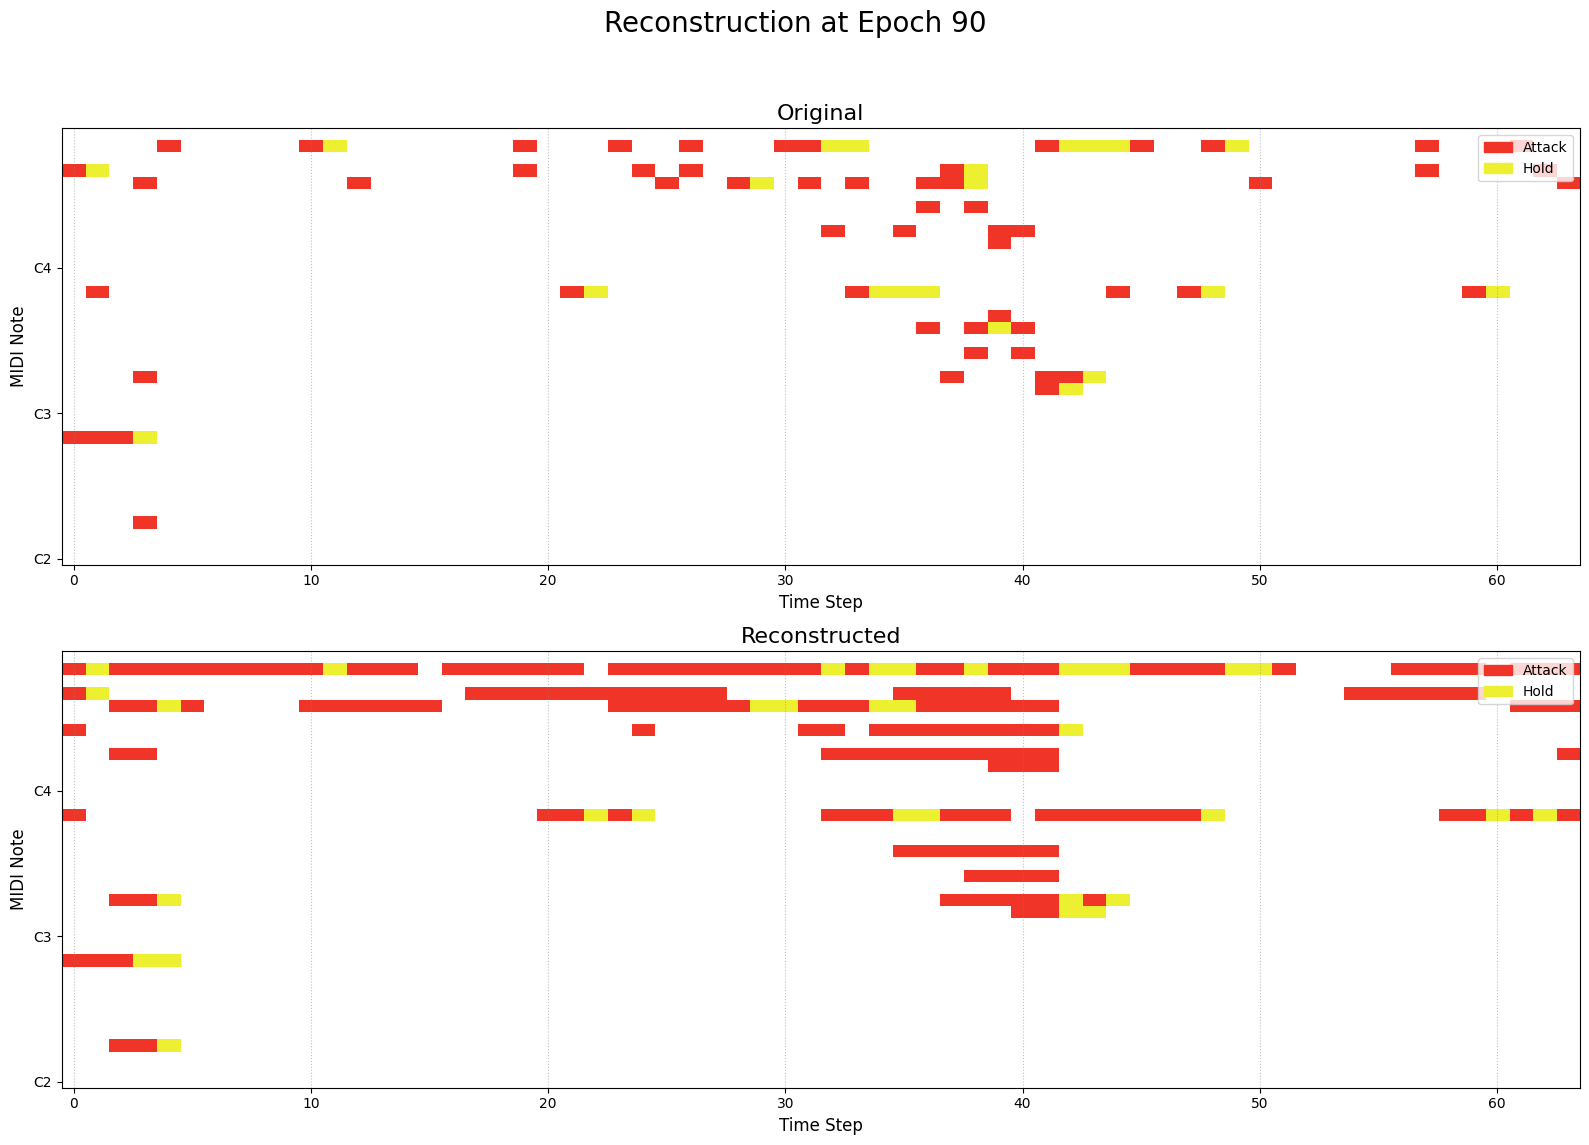

____________________________________________________________ 



Epoch 91/200 [Training]: 100%|██████████| 2797/2797 [02:22<00:00, 19.66it/s, Loss=0.3056, Recon=0.3006, KL=0.6218, beta=0.2275]



Epoch 91 Summary: Avg Train Loss: 0.3244, Avg Val Loss: 0.3795


Epoch 92/200 [Training]: 100%|██████████| 2797/2797 [02:16<00:00, 20.52it/s, Loss=0.3282, Recon=0.3264, KL=0.6076, beta=0.2302]



Epoch 92 Summary: Avg Train Loss: 0.3230, Avg Val Loss: 0.3776


Epoch 93/200 [Training]: 100%|██████████| 2797/2797 [02:16<00:00, 20.42it/s, Loss=0.3082, Recon=0.3082, KL=0.5759, beta=0.2329]



Epoch 93 Summary: Avg Train Loss: 0.3217, Avg Val Loss: 0.3779


Epoch 94/200 [Training]: 100%|██████████| 2797/2797 [02:17<00:00, 20.33it/s, Loss=0.3390, Recon=0.3384, KL=0.6026, beta=0.2355]



Epoch 94 Summary: Avg Train Loss: 0.3204, Avg Val Loss: 0.3783


Epoch 95/200 [Training]: 100%|██████████| 2797/2797 [02:17<00:00, 20.30it/s, Loss=0.3663, Recon=0.3595, KL=0.6285, beta=0.2382]



Epoch 95 Summary: Avg Train Loss: 0.3189, Avg Val Loss: 0.3776
Checkpoint saved to checkpoints/lofi_model_epoch_95.pth


Epoch 96/200 [Training]: 100%|██████████| 2797/2797 [02:16<00:00, 20.51it/s, Loss=0.3632, Recon=0.3619, KL=0.6053, beta=0.2409]



Epoch 96 Summary: Avg Train Loss: 0.3179, Avg Val Loss: 0.3767


Epoch 97/200 [Training]: 100%|██████████| 2797/2797 [02:15<00:00, 20.61it/s, Loss=0.3414, Recon=0.3379, KL=0.6142, beta=0.2436]



Epoch 97 Summary: Avg Train Loss: 0.3164, Avg Val Loss: 0.3764


Epoch 98/200 [Training]: 100%|██████████| 2797/2797 [02:17<00:00, 20.31it/s, Loss=0.3213, Recon=0.3189, KL=0.6097, beta=0.2463]



Epoch 98 Summary: Avg Train Loss: 0.3151, Avg Val Loss: 0.3762


Epoch 99/200 [Training]: 100%|██████████| 2797/2797 [02:02<00:00, 22.76it/s, Loss=0.2865, Recon=0.2783, KL=0.6330, beta=0.2490]



Epoch 99 Summary: Avg Train Loss: 0.3139, Avg Val Loss: 0.3768


Epoch 100/200 [Training]: 100%|██████████| 2797/2797 [02:00<00:00, 23.26it/s, Loss=0.3126, Recon=0.3111, KL=0.6063, beta=0.2500]



Epoch 100 Summary: Avg Train Loss: 0.3127, Avg Val Loss: 0.3766
Checkpoint saved to checkpoints/lofi_model_epoch_100.pth

Generating visualization for epoch 100:
Converting tensor to MIDI file at reconstructed/reconstructed.mid...
MIDI file saved successfully.


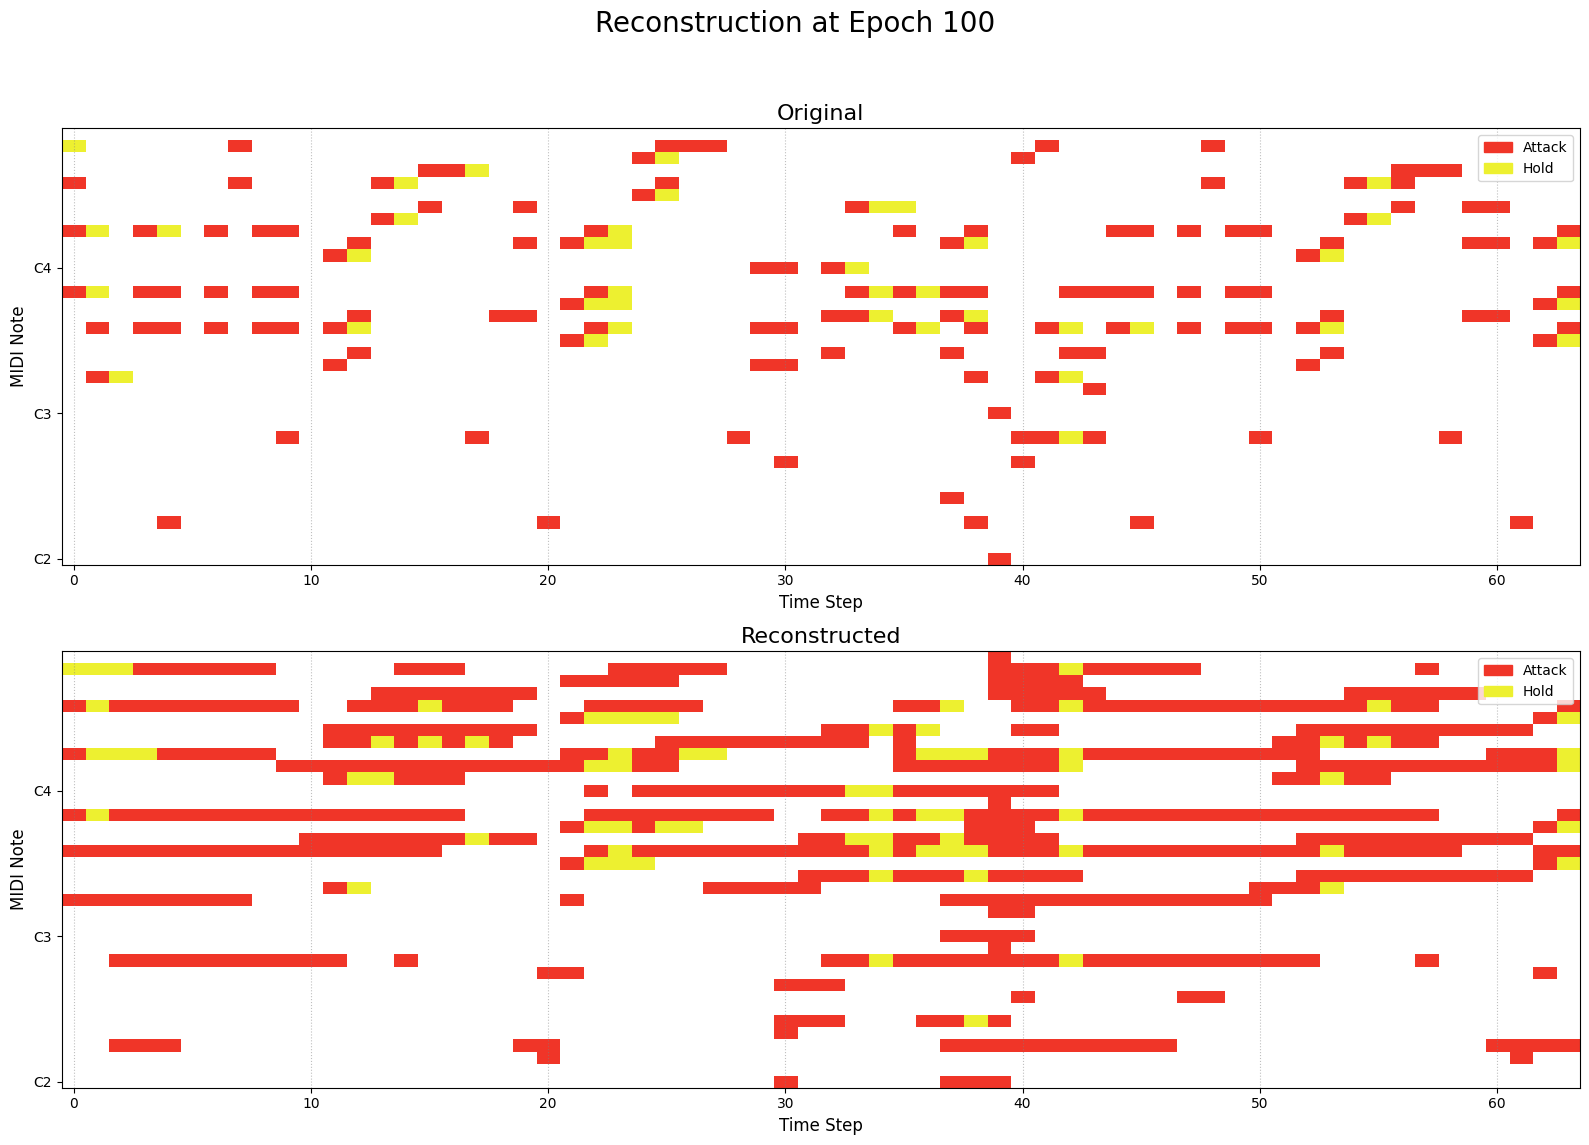

____________________________________________________________ 



Epoch 101/200 [Training]: 100%|██████████| 2797/2797 [02:02<00:00, 22.84it/s, Loss=0.3477, Recon=0.3456, KL=0.6084, beta=0.2500]



Epoch 101 Summary: Avg Train Loss: 0.3114, Avg Val Loss: 0.3760


Epoch 102/200 [Training]: 100%|██████████| 2797/2797 [02:04<00:00, 22.38it/s, Loss=0.3250, Recon=0.3186, KL=0.6257, beta=0.2500]



Epoch 102 Summary: Avg Train Loss: 0.3102, Avg Val Loss: 0.3758


Epoch 103/200 [Training]: 100%|██████████| 2797/2797 [02:02<00:00, 22.83it/s, Loss=0.3299, Recon=0.3262, KL=0.6150, beta=0.2500]



Epoch 103 Summary: Avg Train Loss: 0.3090, Avg Val Loss: 0.3754


Epoch 104/200 [Training]: 100%|██████████| 2797/2797 [02:01<00:00, 22.96it/s, Loss=0.2894, Recon=0.2883, KL=0.6047, beta=0.2500]



Epoch 104 Summary: Avg Train Loss: 0.3078, Avg Val Loss: 0.3750


Epoch 105/200 [Training]: 100%|██████████| 2797/2797 [02:03<00:00, 22.69it/s, Loss=0.2995, Recon=0.2973, KL=0.6091, beta=0.2500]



Epoch 105 Summary: Avg Train Loss: 0.3064, Avg Val Loss: 0.3747
Checkpoint saved to checkpoints/lofi_model_epoch_105.pth


Epoch 106/200 [Training]: 100%|██████████| 2797/2797 [02:01<00:00, 22.98it/s, Loss=0.2858, Recon=0.2858, KL=0.5846, beta=0.2500]



Epoch 106 Summary: Avg Train Loss: 0.3053, Avg Val Loss: 0.3751


Epoch 107/200 [Training]: 100%|██████████| 2797/2797 [02:02<00:00, 22.83it/s, Loss=0.3261, Recon=0.3186, KL=0.6301, beta=0.2500]



Epoch 107 Summary: Avg Train Loss: 0.3041, Avg Val Loss: 0.3754


Epoch 108/200 [Training]: 100%|██████████| 2797/2797 [02:01<00:00, 23.08it/s, Loss=0.3895, Recon=0.3859, KL=0.6142, beta=0.2500]



Epoch 108 Summary: Avg Train Loss: 0.3029, Avg Val Loss: 0.3747


Epoch 109/200 [Training]: 100%|██████████| 2797/2797 [02:02<00:00, 22.83it/s, Loss=0.2467, Recon=0.2467, KL=0.5927, beta=0.2500]



Epoch 109 Summary: Avg Train Loss: 0.3019, Avg Val Loss: 0.3750


Epoch 110/200 [Training]: 100%|██████████| 2797/2797 [02:02<00:00, 22.85it/s, Loss=0.3301, Recon=0.3243, KL=0.6234, beta=0.2500]



Epoch 110 Summary: Avg Train Loss: 0.3005, Avg Val Loss: 0.3759
Checkpoint saved to checkpoints/lofi_model_epoch_110.pth

Generating visualization for epoch 110:
Converting tensor to MIDI file at reconstructed/reconstructed.mid...
MIDI file saved successfully.


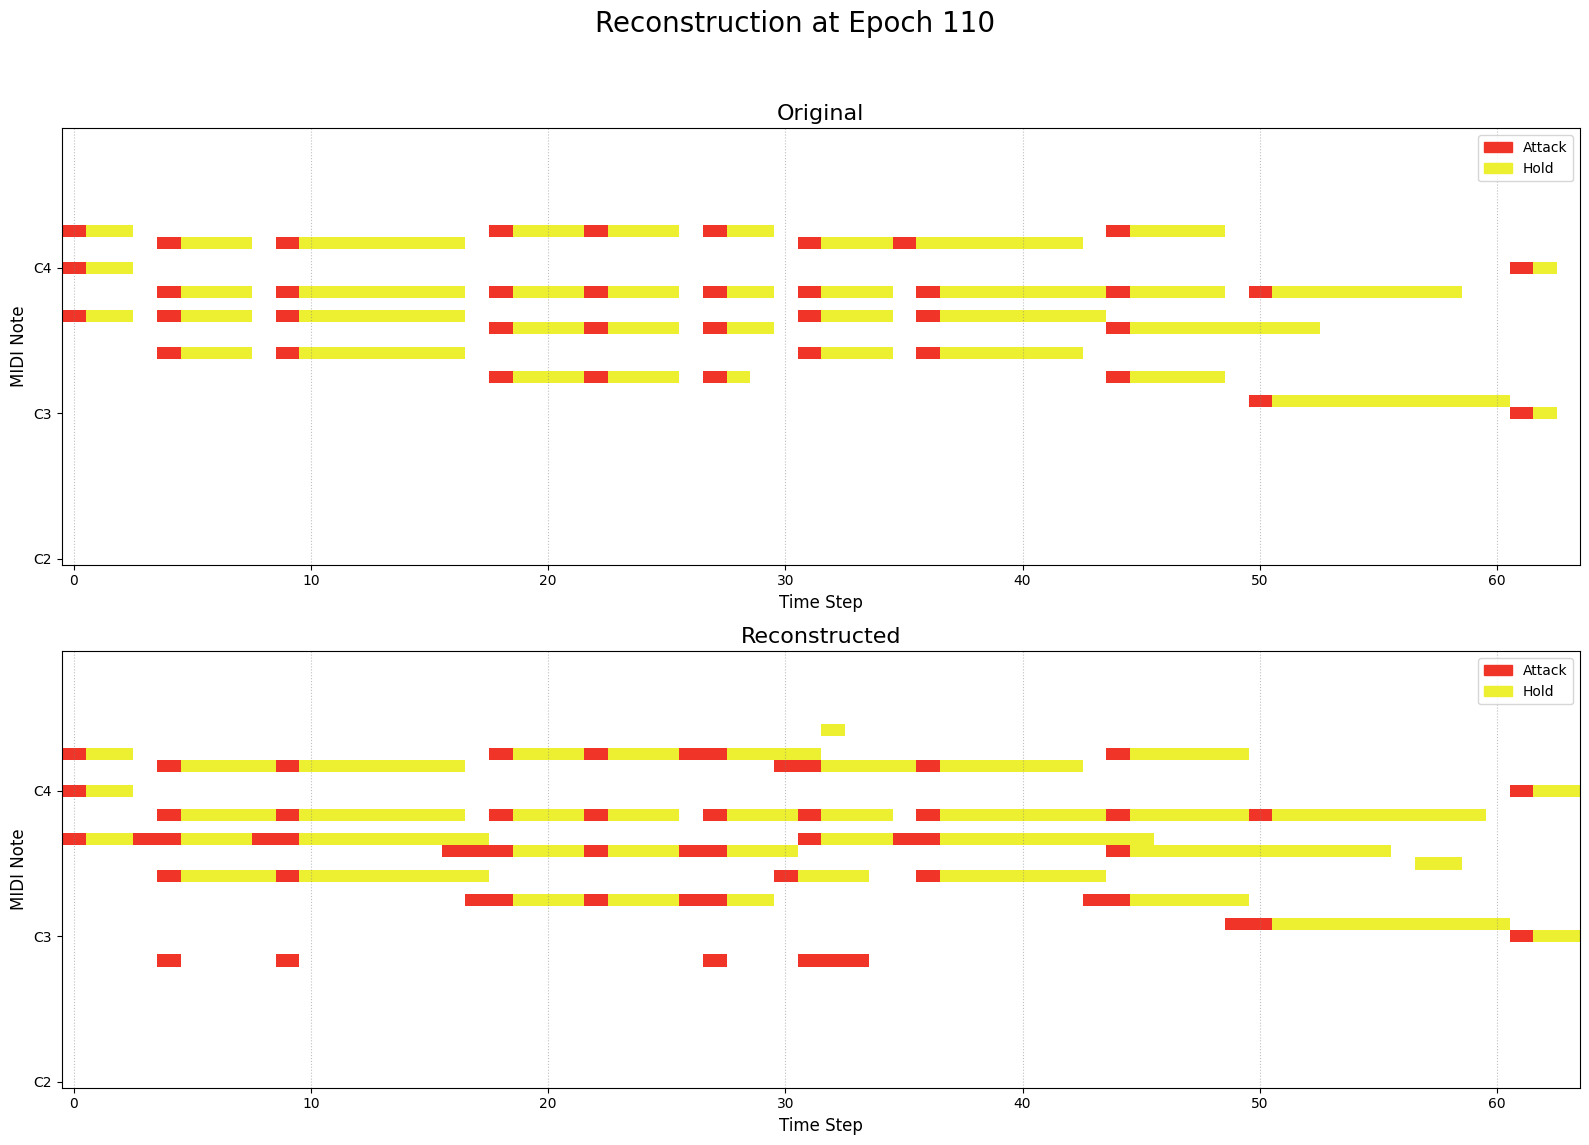

____________________________________________________________ 



Epoch 111/200 [Training]: 100%|██████████| 2797/2797 [02:02<00:00, 22.86it/s, Loss=0.2117, Recon=0.2117, KL=0.5885, beta=0.2500]



Epoch 111 Summary: Avg Train Loss: 0.2995, Avg Val Loss: 0.3752


Epoch 112/200 [Training]: 100%|██████████| 2797/2797 [02:01<00:00, 23.10it/s, Loss=0.2721, Recon=0.2721, KL=0.5682, beta=0.2500]



Epoch 112 Summary: Avg Train Loss: 0.2908, Avg Val Loss: 0.3705


Epoch 113/200 [Training]: 100%|██████████| 2797/2797 [02:03<00:00, 22.62it/s, Loss=0.2749, Recon=0.2670, KL=0.6316, beta=0.2500]



Epoch 113 Summary: Avg Train Loss: 0.2891, Avg Val Loss: 0.3721


Epoch 114/200 [Training]: 100%|██████████| 2797/2797 [02:00<00:00, 23.27it/s, Loss=0.3309, Recon=0.3232, KL=0.6307, beta=0.2500]



Epoch 114 Summary: Avg Train Loss: 0.2881, Avg Val Loss: 0.3716


Epoch 115/200 [Training]: 100%|██████████| 2797/2797 [02:02<00:00, 22.81it/s, Loss=0.2822, Recon=0.2789, KL=0.6130, beta=0.2500]



Epoch 115 Summary: Avg Train Loss: 0.2873, Avg Val Loss: 0.3724
Checkpoint saved to checkpoints/lofi_model_epoch_115.pth


Epoch 116/200 [Training]: 100%|██████████| 2797/2797 [02:08<00:00, 21.76it/s, Loss=0.3648, Recon=0.3593, KL=0.6220, beta=0.2500]



Epoch 116 Summary: Avg Train Loss: 0.2866, Avg Val Loss: 0.3728


Epoch 117/200 [Training]: 100%|██████████| 2797/2797 [02:02<00:00, 22.86it/s, Loss=0.2735, Recon=0.2705, KL=0.6117, beta=0.2500]



Epoch 117 Summary: Avg Train Loss: 0.2858, Avg Val Loss: 0.3730


Epoch 118/200 [Training]: 100%|██████████| 2797/2797 [02:02<00:00, 22.82it/s, Loss=0.3482, Recon=0.3382, KL=0.6402, beta=0.2500]



Epoch 118 Summary: Avg Train Loss: 0.2852, Avg Val Loss: 0.3715


Epoch 119/200 [Training]: 100%|██████████| 2797/2797 [02:04<00:00, 22.48it/s, Loss=0.1961, Recon=0.1961, KL=0.5968, beta=0.2500]



Epoch 119 Summary: Avg Train Loss: 0.2808, Avg Val Loss: 0.3705


Epoch 120/200 [Training]: 100%|██████████| 2797/2797 [02:06<00:00, 22.20it/s, Loss=0.3196, Recon=0.3130, KL=0.6262, beta=0.2500]



Epoch 120 Summary: Avg Train Loss: 0.2799, Avg Val Loss: 0.3713
Checkpoint saved to checkpoints/lofi_model_epoch_120.pth

Generating visualization for epoch 120:
Converting tensor to MIDI file at reconstructed/reconstructed.mid...
MIDI file saved successfully.


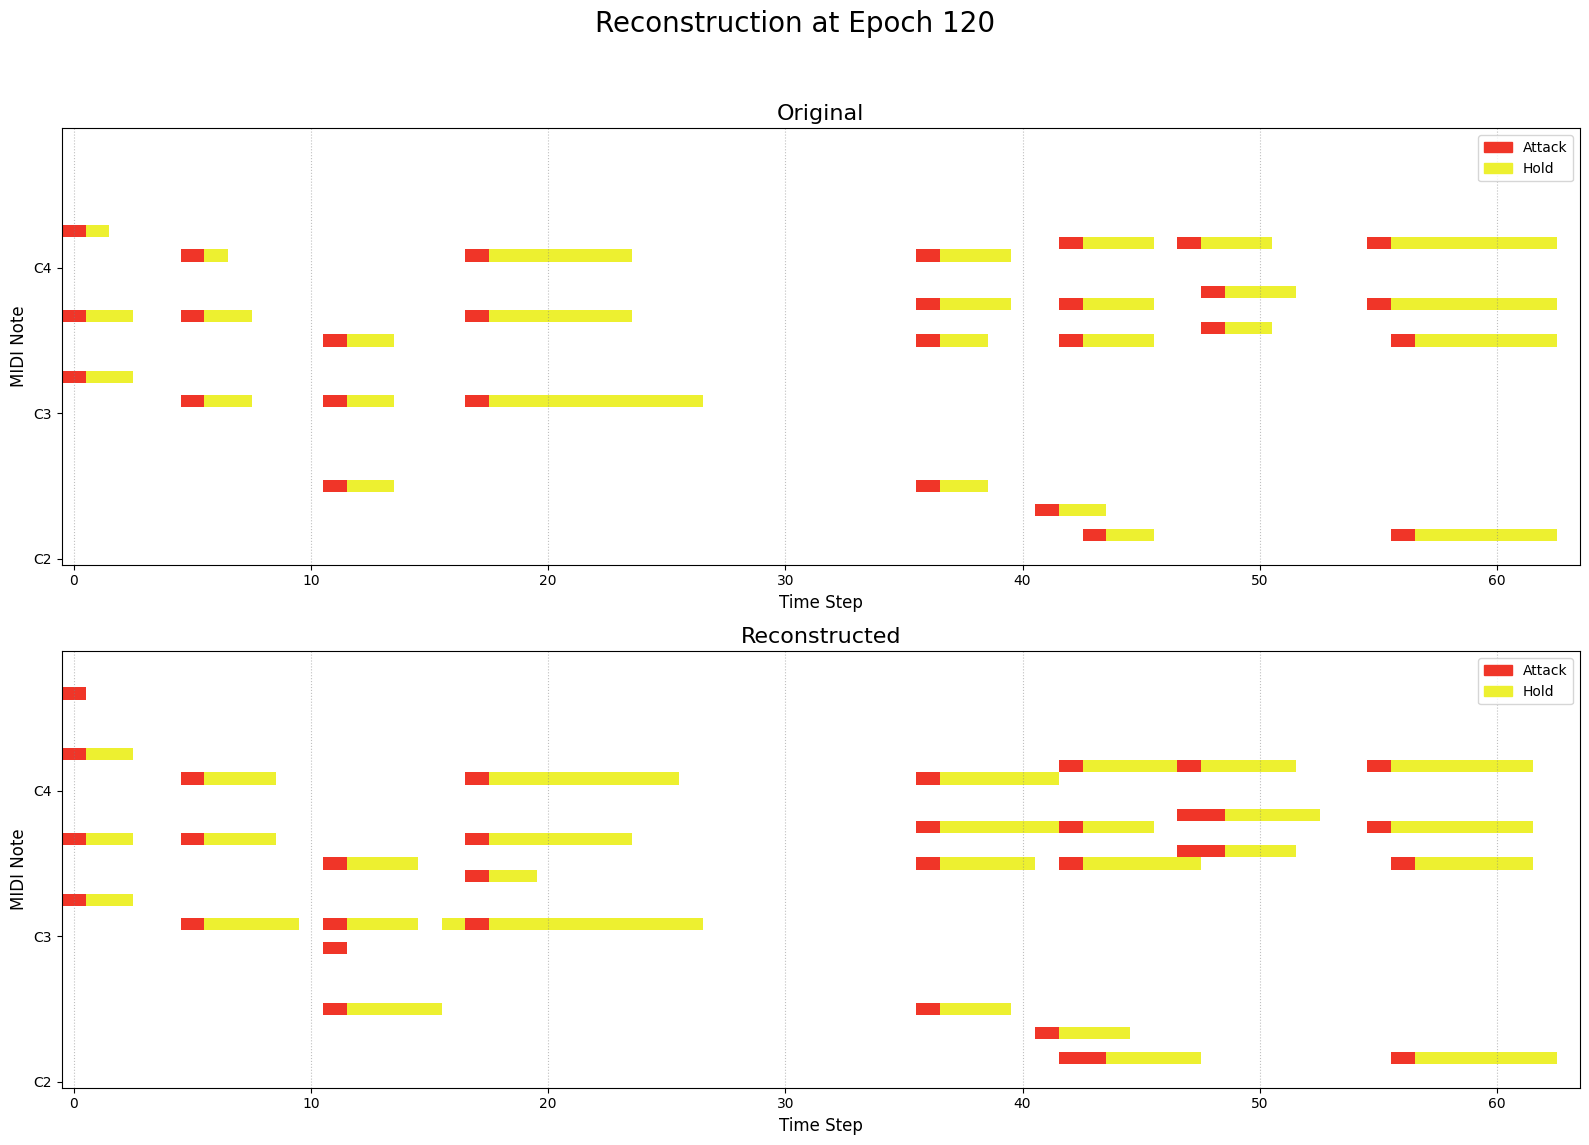

____________________________________________________________ 



Epoch 121/200 [Training]: 100%|██████████| 2797/2797 [02:06<00:00, 22.14it/s, Loss=0.3142, Recon=0.3142, KL=0.5955, beta=0.2500]



Epoch 121 Summary: Avg Train Loss: 0.2794, Avg Val Loss: 0.3706


Epoch 122/200 [Training]: 100%|██████████| 2797/2797 [01:58<00:00, 23.52it/s, Loss=0.3157, Recon=0.3079, KL=0.6314, beta=0.2500]



Epoch 122 Summary: Avg Train Loss: 0.2789, Avg Val Loss: 0.3718


Epoch 123/200 [Training]: 100%|██████████| 2797/2797 [02:02<00:00, 22.80it/s, Loss=0.2962, Recon=0.2920, KL=0.6166, beta=0.2500]



Epoch 123 Summary: Avg Train Loss: 0.2784, Avg Val Loss: 0.3718


Epoch 124/200 [Training]: 100%|██████████| 2797/2797 [02:04<00:00, 22.46it/s, Loss=0.2794, Recon=0.2743, KL=0.6205, beta=0.2500]



Epoch 124 Summary: Avg Train Loss: 0.2780, Avg Val Loss: 0.3719


Epoch 125/200 [Training]: 100%|██████████| 2797/2797 [02:06<00:00, 22.16it/s, Loss=0.2718, Recon=0.2705, KL=0.6054, beta=0.2500]



Epoch 125 Summary: Avg Train Loss: 0.2760, Avg Val Loss: 0.3717
Checkpoint saved to checkpoints/lofi_model_epoch_125.pth


Epoch 126/200 [Training]: 100%|██████████| 2797/2797 [02:05<00:00, 22.30it/s, Loss=0.2269, Recon=0.2269, KL=0.5973, beta=0.2500]



Epoch 126 Summary: Avg Train Loss: 0.2754, Avg Val Loss: 0.3717


Epoch 127/200 [Training]: 100%|██████████| 2797/2797 [02:05<00:00, 22.36it/s, Loss=0.3009, Recon=0.2957, KL=0.6207, beta=0.2500]



Epoch 127 Summary: Avg Train Loss: 0.2751, Avg Val Loss: 0.3712


Epoch 128/200 [Training]: 100%|██████████| 2797/2797 [02:04<00:00, 22.46it/s, Loss=0.2406, Recon=0.2406, KL=0.5764, beta=0.2500]



Epoch 128 Summary: Avg Train Loss: 0.2749, Avg Val Loss: 0.3718


Epoch 129/200 [Training]: 100%|██████████| 2797/2797 [02:12<00:00, 21.16it/s, Loss=0.2925, Recon=0.2857, KL=0.6271, beta=0.2500]



Epoch 129 Summary: Avg Train Loss: 0.2747, Avg Val Loss: 0.3717


Epoch 130/200 [Training]: 100%|██████████| 2797/2797 [02:12<00:00, 21.07it/s, Loss=0.3233, Recon=0.3228, KL=0.6021, beta=0.2500]



Epoch 130 Summary: Avg Train Loss: 0.2744, Avg Val Loss: 0.3717
Checkpoint saved to checkpoints/lofi_model_epoch_130.pth

Generating visualization for epoch 130:
Converting tensor to MIDI file at reconstructed/reconstructed.mid...
MIDI file saved successfully.


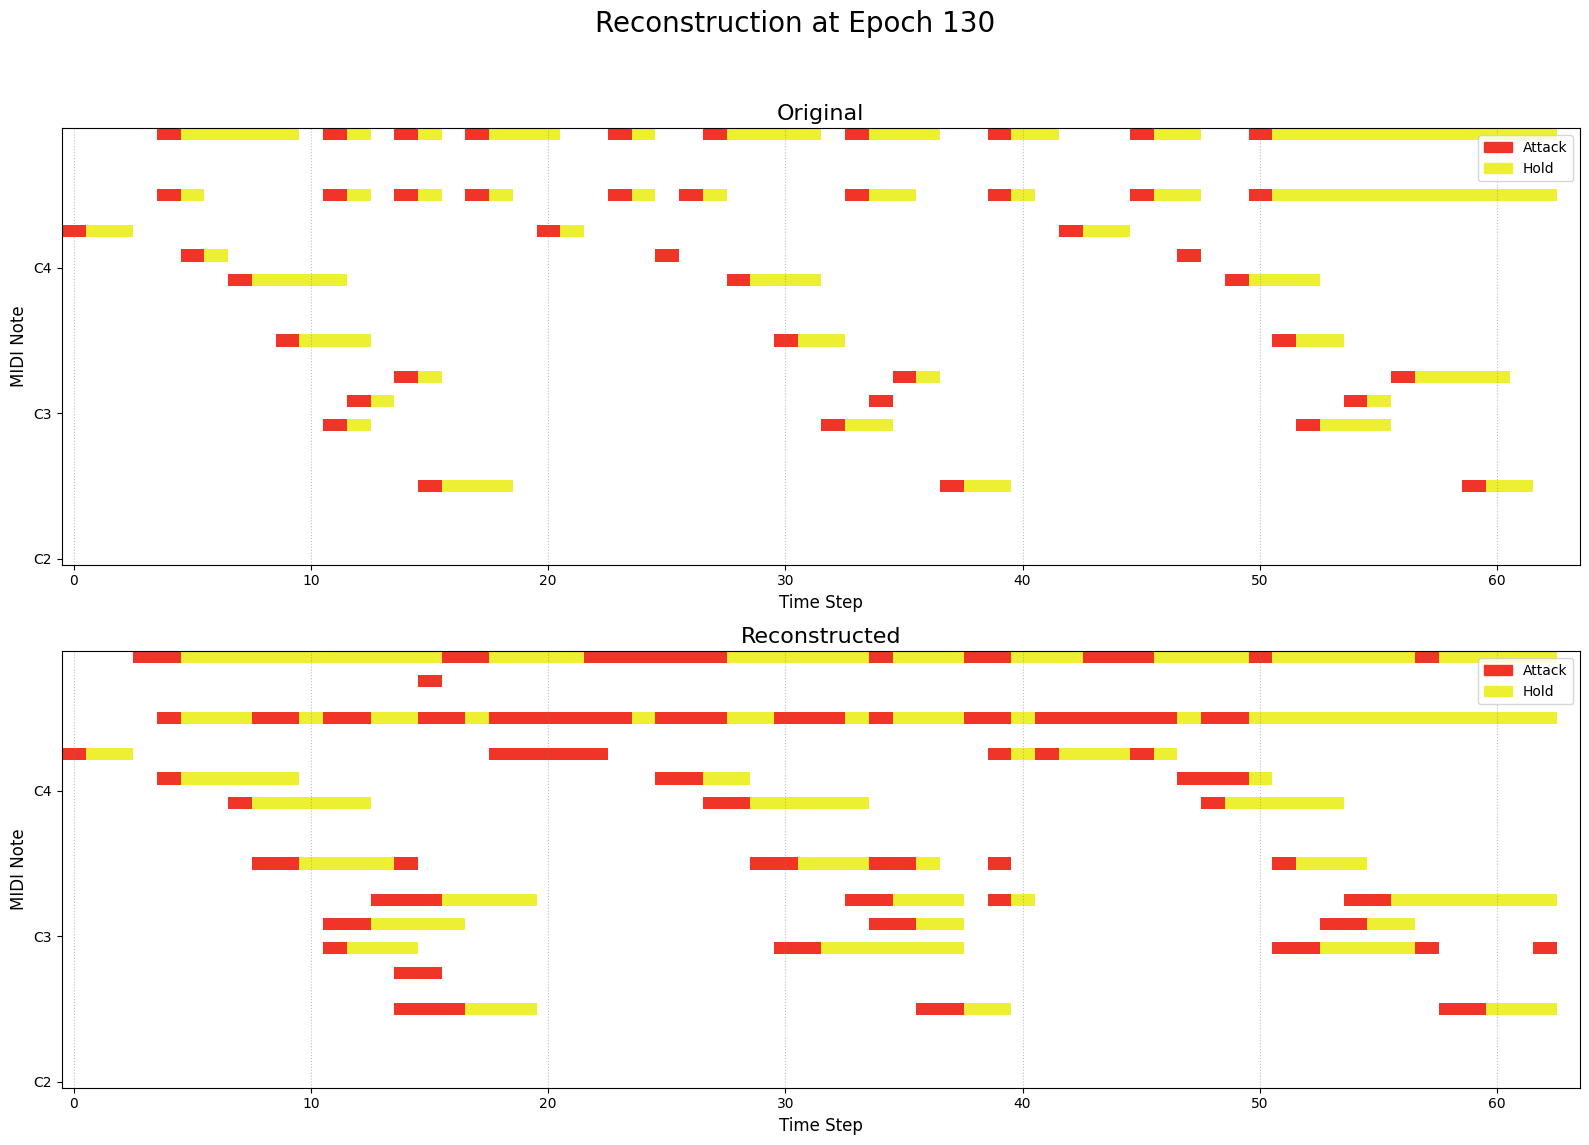

____________________________________________________________ 



Epoch 131/200 [Training]: 100%|██████████| 2797/2797 [02:13<00:00, 21.01it/s, Loss=0.2372, Recon=0.2332, KL=0.6161, beta=0.2500]



Epoch 131 Summary: Avg Train Loss: 0.2734, Avg Val Loss: 0.3715


Epoch 132/200 [Training]: 100%|██████████| 2797/2797 [02:13<00:00, 20.99it/s, Loss=0.2883, Recon=0.2765, KL=0.6473, beta=0.2500]



Epoch 132 Summary: Avg Train Loss: 0.2732, Avg Val Loss: 0.3721


Epoch 133/200 [Training]: 100%|██████████| 2797/2797 [02:08<00:00, 21.82it/s, Loss=0.2791, Recon=0.2729, KL=0.6246, beta=0.2500]



Epoch 133 Summary: Avg Train Loss: 0.2730, Avg Val Loss: 0.3719


Epoch 134/200 [Training]: 100%|██████████| 2797/2797 [02:08<00:00, 21.84it/s, Loss=0.2399, Recon=0.2373, KL=0.6106, beta=0.2500]



Epoch 134 Summary: Avg Train Loss: 0.2728, Avg Val Loss: 0.3724


Epoch 135/200 [Training]: 100%|██████████| 2797/2797 [02:02<00:00, 22.80it/s, Loss=0.3030, Recon=0.2983, KL=0.6187, beta=0.2500]



Epoch 135 Summary: Avg Train Loss: 0.2727, Avg Val Loss: 0.3724
Checkpoint saved to checkpoints/lofi_model_epoch_135.pth


Epoch 136/200 [Training]: 100%|██████████| 2797/2797 [02:13<00:00, 20.91it/s, Loss=0.2883, Recon=0.2831, KL=0.6205, beta=0.2500]



Epoch 136 Summary: Avg Train Loss: 0.2725, Avg Val Loss: 0.3720


Epoch 137/200 [Training]:  10%|█         | 287/2797 [00:13<01:58, 21.18it/s, Loss=0.2789, Recon=0.2746, KL=0.6174, beta=0.2500]


KeyboardInterrupt: 

In [3]:
train(model, experiment_name="Maestro dataset")